In [1]:
####### Setup
# https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox,TextArea
import matplotlib.cbook as cbook
import matplotlib.mlab as mlab
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import cv2
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
while not (os.getcwd().split('\\')[-1] == 'ecological-networks' or os.getcwd().split('/')[-1] == 'ecological-networks'):
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
global DATA_TYPE
DATA_TYPE = 'Real_2D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

def CASE_init(CASE_TO_SOLVE):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_TO_SOLVE_init(DATA_TYPE)
    NetworkName_Solved_df = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_{DATA_TYPE.split('_')[0]}.pkl"))
    M = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"M_{DATA_TYPE.split('_')[0]}.pkl"))
    if DATA_TYPE.split('_')[0] == 'Syn':
        M = {k:M[k] for k in M.keys() if int(k.split('_')[2]) == 100}
    return DATA_TYPE, NetworkName_Solved_df, M

def init_HeatmapData(Case, Start = 0, End = -1):
    if End == -1:
        End = Start + 1
    if Case == 1:
        Heatmap01_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap01_{DATA_TYPE}.pkl"))
        return {k:Heatmap01_All[k][Start:End] for k in Heatmap01_All.keys()}
    if Case == 2:
        Heatmap02_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap02_{DATA_TYPE}.pkl"))
        return {k:Heatmap02_All[k][Start:End] for k in Heatmap02_All.keys()}
    if Case == 3:
        Heatmap03_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap03_{DATA_TYPE}.pkl"))
        return {k:Heatmap03_All[k][Start:End] for k in Heatmap03_All.keys()}

d:\Github\ecological-networks\Code\01_Species_Reintroductions
d:\Github\ecological-networks\Code
d:\Github\ecological-networks
Real_2D


In [2]:
def violinplot(dataset, positions=None, vert=True, widths=0.5,
            showmeans=False, showextrema=True, showmedians=False,
            quantiles=None, points=100, bw_method=None):
    def _kde_method(X, coords):
        if hasattr(X, 'values'):  # support pandas.Series
            X = X.values
        # fallback gracefully if the vector contains only one value
        if np.all(X[0] == X):
            return (X[0] == coords).astype(float)
        kde = mlab.GaussianKDE(X, bw_method)
        return kde.evaluate(coords)

    vpstats = cbook.violin_stats(dataset, _kde_method, points=points, quantiles=quantiles)
    return vpstats, positions, vert, widths, showmeans, showextrema, showmedians

In [4]:
def get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D"):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_init(CASE_TO_SOLVE)

    if DATA_TYPE.split("_")[1] == '1D':
        Flag = [0,1,2,3,4]
    elif DATA_TYPE.split("_")[1] == '2D':
        Flag = [1,2,3,4]

    Strategy_Name = ['System','Degree','Closeness','Betweenness','Random']
    File_Lables = ['Data_three', 'Data_four', 'Data_five', 'Data_six', 'Data_rand']
    Flag_Strategy = {k:Strategy_Name[k] for k in Flag}

    Data = []
    Data_All = []
    for s in Flag:
        Data += [UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"{DATA_TYPE}_Data", 'Averaged', NetworkName, f"{NetworkName}-{File_Lables[s]}.pkl"))]
        Data_All += [UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"{DATA_TYPE}_Data", 'Averaged', NetworkName, f"{NetworkName}-{File_Lables[s]}_All.pkl"))]
    del s, File_Lables

    Key_Sequence = [
        (0,2,0), (0,5,0), (0,8,0),
        (1,2,0), (1,5,0), (1,8,0),
        (2,2,0), (2,5,0), (2,8,0)
        ]

    data = {}
    for s in range(len(Flag)):
        data[Flag[s]] = pd.DataFrame(columns = ['key', 'Var', 'Value'])
        for Var in ['Abundance', 'Resilience', 'Persistence']:
            for k in range(9):
                key = Key_Sequence[k]
                x = Data_All[s][key,0][Var].flatten()
                for v in x:
                    data[Flag[s]] = data[Flag[s]].append(pd.DataFrame([[k, Var, v]], columns = ['key', 'Var', 'Value']), ignore_index = True)
    del Var, k, key, x, v, s
    
    for s in Flag:
        data[s].loc[data[s].Var == 'Resilience', 'Value'] = (data[s].loc[data[s].Var == 'Resilience', 'Value'] - 0.0)/(300.0 - 0.0)
    
    if DATA_TYPE.split("_")[1] == '1D':
        for s in Flag:
            data[s].loc[data[s].Var == 'Abundance', 'Value'] = (data[s].loc[data[s].Var == 'Abundance', 'Value'] - 0.0)/(14.0 - 0.0)
    return data

In [ ]:
####### Figure
# Resilience -> red # Persistence -> blue
c = {
    0:'y', 
    1:'green', 
    2:'cyan', 
    3: 'magenta', 
    4:'orange'
    }
f, ax = plt.subplots(1,2, figsize = (30,30), dpi = 300)

#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_1D.png'))
im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_1D_S01_AF.png'))
#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_1D_S12_AF.png'))
#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_1D_S01_AT.png'))
#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_1D_S12_AT.png'))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
ax[0].imshow(im)
ax[0].axis('off')

#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_2D.png'))
im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_2D_S01_AF.png'))
#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_2D_S12_AF.png'))
#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_2D_S01_AT.png'))
#im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_2D_S12_AT.png'))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
ax[1].imshow(im)
ax[1].axis('off')

f.text(0.17, 0.63, r"(a)", va='center', ha='center', fontsize=36, style='italic')
f.text(0.60, 0.63, r"(b)", va='center', ha='center', fontsize=36, style='italic')

f.text(0.55, 0.30, r"Perturbation Strategy", va='center', ha='left', fontsize=22, style='italic')
f.text(0.60, 0.28, r"G $\longrightarrow$ Generalist Preferred", va='center', ha='left', fontsize=22, style='italic')
f.text(0.60, 0.26, r"S $\longrightarrow$ Specialist Preferred", va='center', ha='left', fontsize=22, style='italic')
f.text(0.60, 0.24, r"R $\longrightarrow$ Random Selection", va='center', ha='left', fontsize=22, style='italic')

legend_elements = [
    Patch(facecolor='red', label='Settling TIme', alpha = 0.5),
    Patch(facecolor='blue', label='Persistence', alpha = 0.5),
    ]
l1 = ax[0].legend(handles=legend_elements, bbox_to_anchor = [0.2,-0.10], loc = 'upper left', title = '', fontsize = 22, frameon = False, ncol = 2)
# l1.get_title().set_fontsize(44)
legend_elements = [
    Line2D([0], [0], color=c[1], lw=3, label='Degree'),
    Line2D([0], [0], color=c[2], lw=3, label='Closeness'),
    Line2D([0], [0], color=c[3], lw=3, label='Betweenness'),
    Line2D([0], [0], color=c[0], lw=3, label='System'),
    Line2D([0], [0], color=c[4], lw=3, label='Random')
    ]
l2 = ax[0].legend(handles=legend_elements, bbox_to_anchor = [0.0,-0.25], loc = 'upper left', title = 'Reintroduction Strategies', fontsize = 22, frameon = False, ncol = 5)
l2.get_title().set_fontsize(22)
ax[0].add_artist(l1)

del f,ax,im
del c, l1, l2, legend_elements

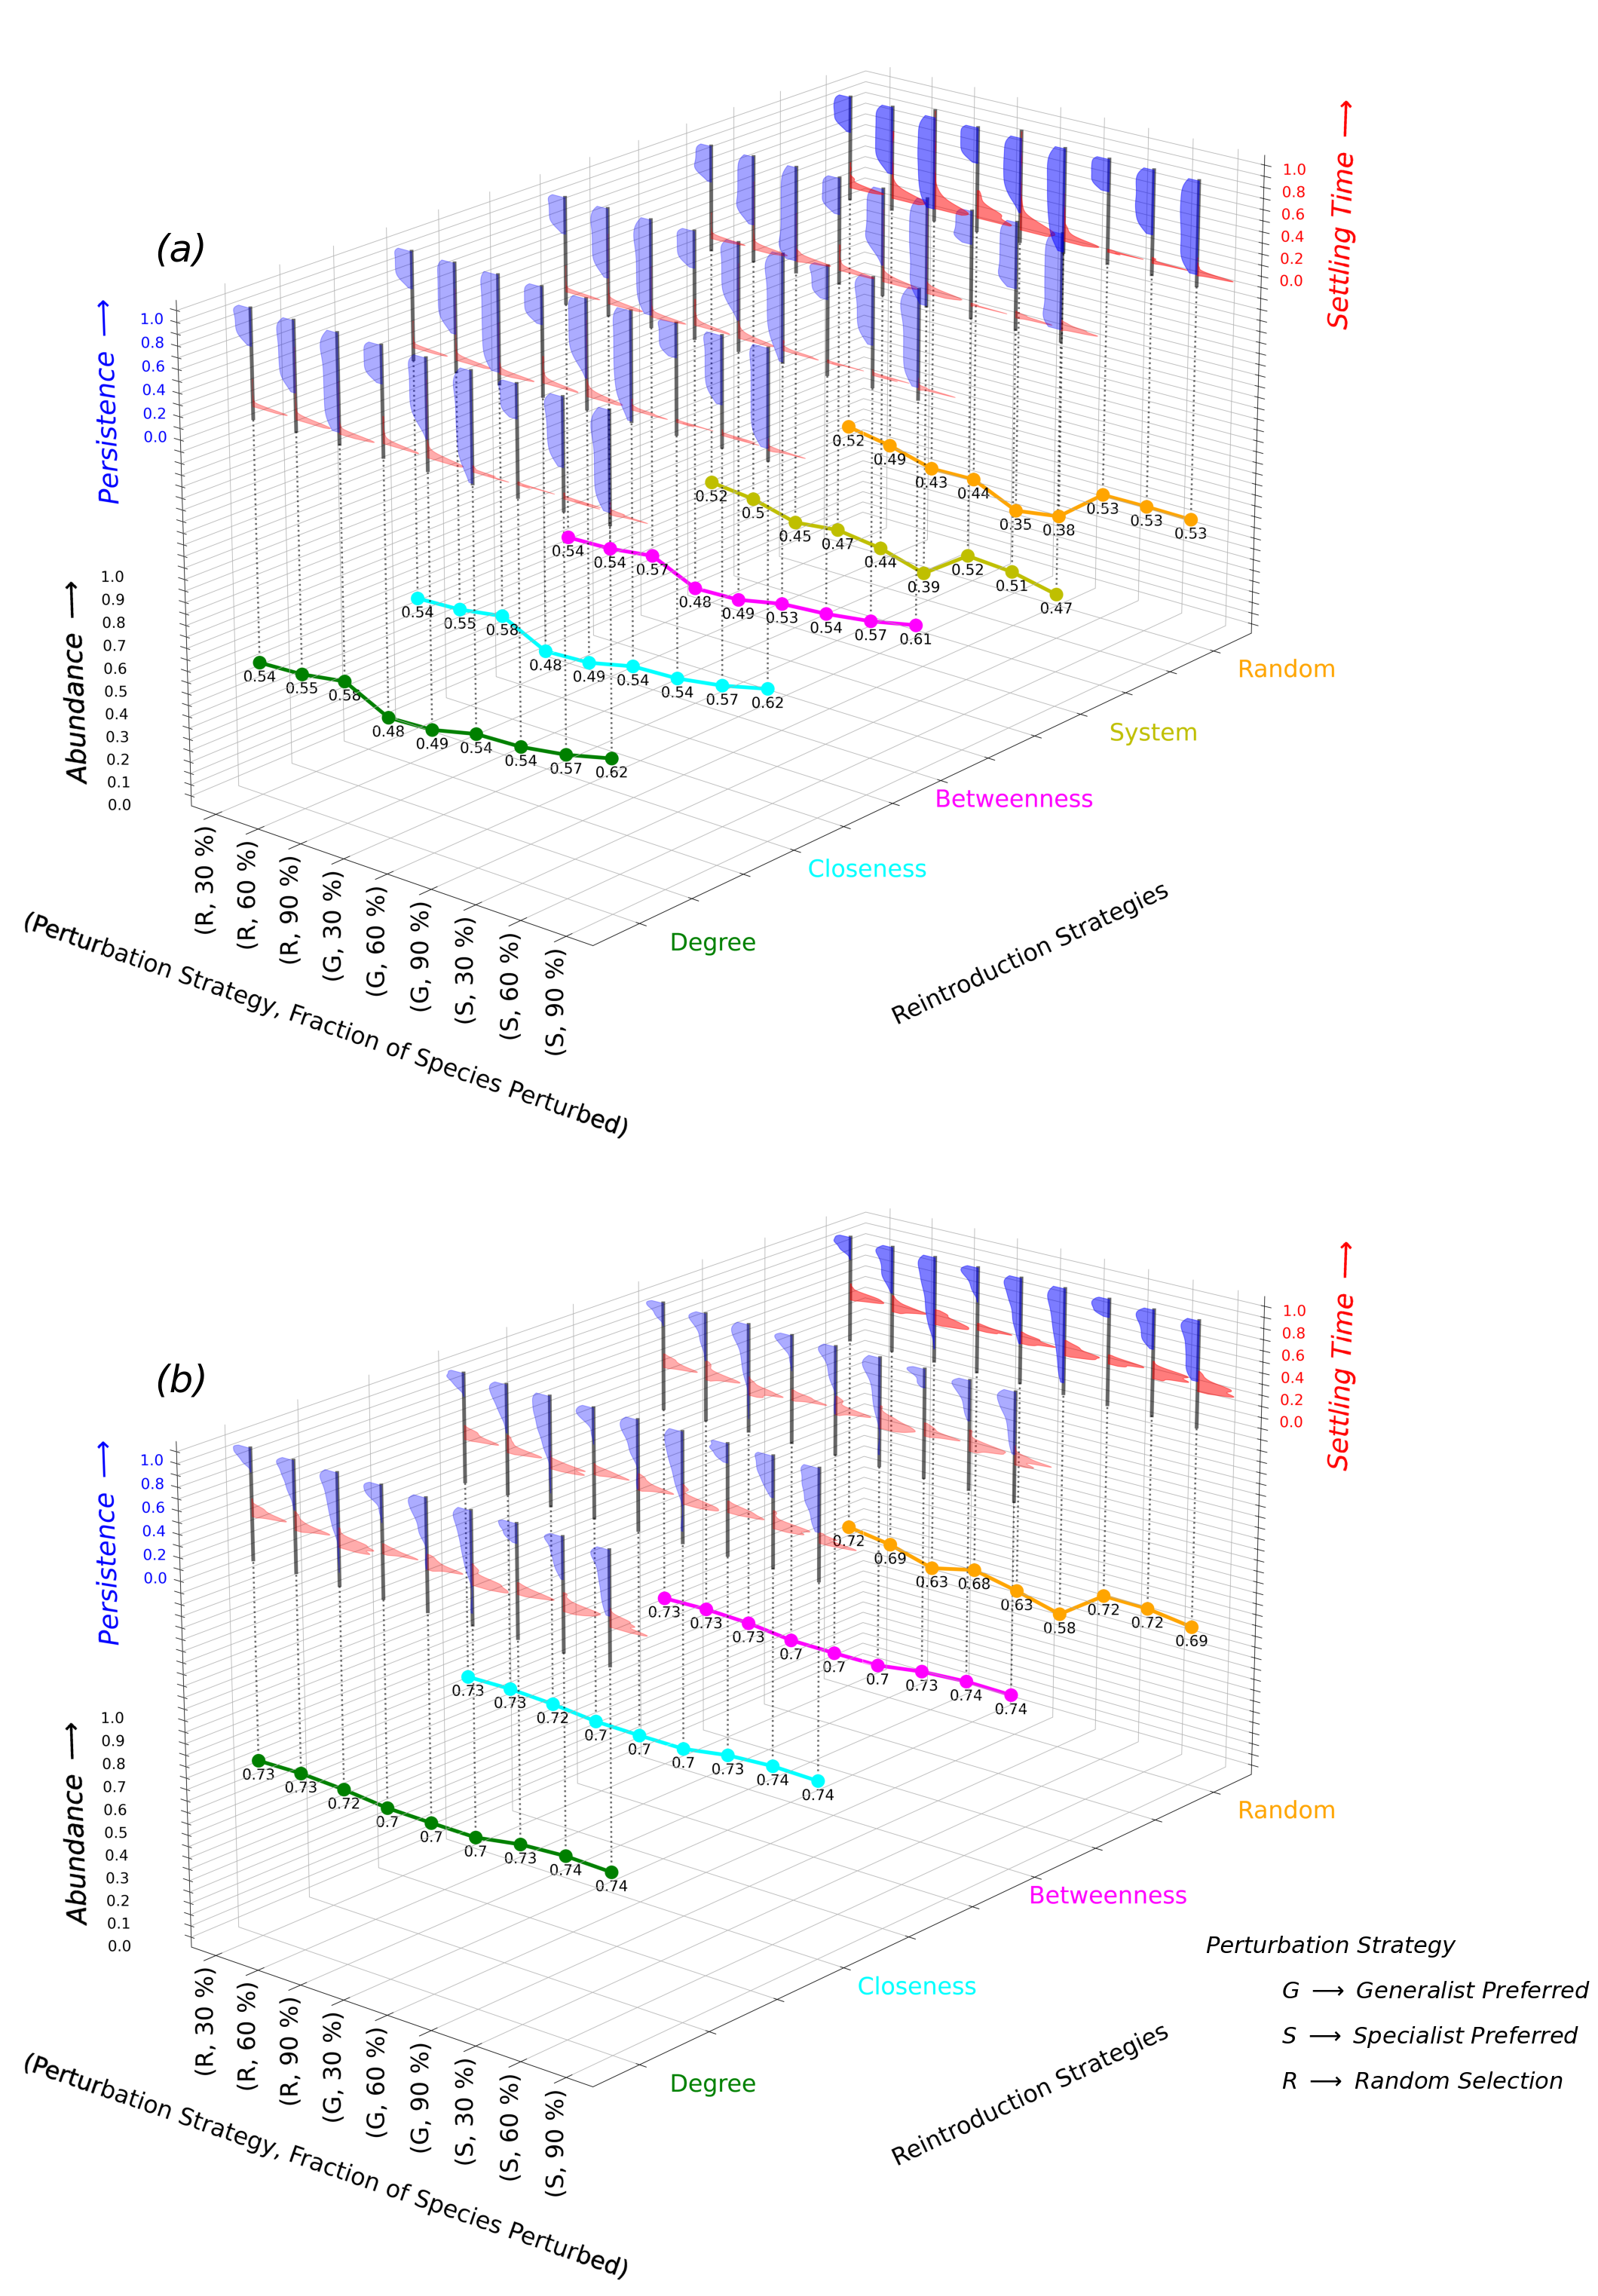

In [5]:
####### Figure
# Resilience -> red # Persistence -> blue
c = {
    0:'y', 
    1:'green', 
    2:'cyan', 
    3: 'magenta', 
    4:'orange'
    }
f, ax = plt.subplots(2,1, figsize = (20,30), dpi = 100)
f.tight_layout(pad = -2)

im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_1D_S12_AT_New.png'))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
ax[0].imshow(im[800:,:,:])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].axis('off')

im = cv2.imread(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Images', 'Figure02_2D_S12_AT_New.png'))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
ax[1].imshow(im[800:,:,:])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].axis('off')

f.text(0.17, 0.9, r"(a)", va='center', ha='center', fontsize=36, style='italic')
f.text(0.17, 0.4, r"(b)", va='center', ha='center', fontsize=36, style='italic')

f.text(0.85, 0.15, r"Perturbation Strategy", va='center', ha='left', fontsize=22, style='italic')
f.text(0.90, 0.13, r"G $\longrightarrow$ Generalist Preferred", va='center', ha='left', fontsize=22, style='italic')
f.text(0.90, 0.11, r"S $\longrightarrow$ Specialist Preferred", va='center', ha='left', fontsize=22, style='italic')
f.text(0.90, 0.09, r"R $\longrightarrow$ Random Selection", va='center', ha='left', fontsize=22, style='italic')
'''
legend_elements = [
    Patch(facecolor='red', label='Settling Time', alpha = 0.5),
    Patch(facecolor='blue', label='Persistence', alpha = 0.5),
    ]
l1 = ax[0].legend(handles=legend_elements, bbox_to_anchor = [0.2,-0.10], loc = 'upper left', title = '', fontsize = 22, frameon = False, ncol = 2)
# l1.get_title().set_fontsize(44)
legend_elements = [
    Line2D([0], [0], color=c[1], lw=3, label='Degree'),
    Line2D([0], [0], color=c[2], lw=3, label='Closeness'),
    Line2D([0], [0], color=c[3], lw=3, label='Betweenness'),
    Line2D([0], [0], color=c[0], lw=3, label='System'),
    Line2D([0], [0], color=c[4], lw=3, label='Random')
    ]
l2 = ax[0].legend(handles=legend_elements, bbox_to_anchor = [0.0,-0.25], loc = 'upper left', title = 'Reintroduction Strategies', fontsize = 22, frameon = False, ncol = 5)
l2.get_title().set_fontsize(22)
ax[0].add_artist(l1)

del c, l1, l2, legend_elements
'''
del f,ax,im

In [ ]:
####### 3D Figure for 2D Model (Configuration 1)
'''
# data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D")
## next better 2 axes object plot
# c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
c = {0:'y', 1:'green', 2:'cyan', 3: 'magenta', 4:'orange'}
s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
Key_lst = np.linspace(0,100,9)
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d', label = '1')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

for s in data.keys():
    ax.plot(
        Key_lst, #np.arange(9),
        [s_coords[s] for _ in range(9)],
        [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
        color=c[s],
        linewidth = 5,
        zorder = 5-s
        )
    x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]

    # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s, zdir='y')
ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
ax2.patch.set_alpha(0.0)

ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')

# ax2.grid(False)

for s in data.keys():
    for k in range(9):
        X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
        temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
        temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
        # [0:Strategy, 1:Width, 2:Height]
        # [0.5, 0.075]
        fw = 0.65
        fh = 0.1
        C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*fw*temp[0][0]['vals']), list(temp[0][0]['coords'])]
        C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*fw*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]
        
        # ax.plot([x+Key_lst[k] for x in C1[1]], C1[0], [np.mean(X_Val[k]) + x*fh for x in C1[2]], color = 'orange', linestyle = 'dashed')
        # ax.plot([x+Key_lst[k] for x in C2[1]], C2[0], [np.mean(X_Val[k]) + x*fh for x in C2[2]], color = 'yellow', linestyle = 'dashed')
        
        alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.4, 0:0.2}
        ax2.add_collection3d(plt.fill_betweenx([np.mean(X_Val[k]) + 0.0 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        ax2.add_collection3d(plt.fill_betweenx([np.mean(X_Val[k]) + 0.0 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        
        ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
        
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]) +0.0, 0.0+np.mean(X_Val[k]) + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 3, alpha = 0.4)

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                     tmp_planes[0], tmp_planes[1],
                     tmp_planes[4], tmp_planes[5])

ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                      tmp_planes[1], tmp_planes[0],
                      tmp_planes[4], tmp_planes[5])

ax.set_zlim([0.55, 1.0])
ax2.set_zlim([0.55, 1.0])

ax.set_xlabel('\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)

ax.set_ylabel('\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)

ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)

e, a = [40,-75]
# e, a = [25,-75]
# ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
ax.view_init(e, a)
ax2.view_init(e, a)

ax.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticks(Key_lst)
# ax.set_xticklabels(np.arange(9))
ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
ax2.set_xticks(Key_lst)
# ax2.set_xticklabels(np.arange(9))
ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)

ax.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])
ax2.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])

del e, a, ax, C1, C2, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords
'''

In [ ]:
####### 3D Figure for 2D Model (Configuration 2)
'''
# data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D")
## next better 2 axes object plot
# c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
c = {0:'y', 1:'green', 2:'cyan', 3: 'magenta', 4:'orange'}
s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
Key_lst = np.linspace(0,100,9)
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d', label = '1')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

for s in data.keys():
    ax.plot(
        Key_lst, #np.arange(9),
        [s_coords[s] for _ in range(9)],
        [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
        color=c[s],
        linewidth = 5,
        zorder = 5-s
        )
    x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]

    # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s, zdir='y')
ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
ax2.patch.set_alpha(0.0)

ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')

# ax2.grid(False)

for s in data.keys():
    for k in range(9):
        X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
        temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
        temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
        # [0:Strategy, 1:Width, 2:Height]
        # [0.5, 0.075]
        fw = 0.65
        fh = 0.3
        C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*fw*temp[0][0]['vals']), list(temp[0][0]['coords'])]
        C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*fw*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]
        
        # ax.plot([x+Key_lst[k] for x in C1[1]], C1[0], [np.mean(X_Val[k]) + x*fh for x in C1[2]], color = 'orange', linestyle = 'dashed')
        # ax.plot([x+Key_lst[k] for x in C2[1]], C2[0], [np.mean(X_Val[k]) + x*fh for x in C2[2]], color = 'yellow', linestyle = 'dashed')
        
        alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.4, 0:0.2}
        ax2.add_collection3d(plt.fill_betweenx([1.0 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        ax2.add_collection3d(plt.fill_betweenx([1.0 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        
        ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
        
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.0  ], color = 'black', linewidth = 3, alpha = 0.4, linestyle = 'dotted')
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.0, 1.0 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 3, alpha = 0.6)

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                     tmp_planes[0], tmp_planes[1],
                     tmp_planes[4], tmp_planes[5])

ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                      tmp_planes[1], tmp_planes[0],
                      tmp_planes[4], tmp_planes[5])
# 0.55,1.0 1.05, 1.55
ax.set_zlim([0.55, 1.55])
ax2.set_zlim([0.55, 1.55])

ax.set_xlabel('\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)

ax.set_ylabel('\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)

ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)

e, a = [40,-75]
# e, a = [25,-75]
# ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
ax.view_init(e, a)
ax2.view_init(e, a)

ax.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticks(Key_lst)
# ax.set_xticklabels(np.arange(9))
ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
ax2.set_xticks(Key_lst)
# ax2.set_xticklabels(np.arange(9))
ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)

ax.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])
ax2.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])

del e, a, ax, C1, C2, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords
'''

In [ ]:
####### 3D Figure for 2D Model (Configuration 3)
'''
# data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D")
## next better 2 axes object plot
# c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
c = {0:'y', 1:'green', 2:'cyan', 3: 'magenta', 4:'orange'}
s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
Key_lst = np.linspace(0,100,9)
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d', label = '1')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

for s in data.keys():
    ax.plot(
        Key_lst, #np.arange(9),
        [s_coords[s] for _ in range(9)],
        [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
        color=c[s],
        linewidth = 5,
        zorder = 5-s
        )
    x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]

    # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s_coords[s], zdir='y')
ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
ax2.patch.set_alpha(0.0)

ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')

# ax2.grid(False)
# ax.grid(False)

for s in data.keys():
    for k in range(9):
        X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
        temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
        temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
        # [0:Strategy, 1:Width, 2:Height]
        # [0.5, 0.075]
        fw = 0.65
        fh = 1.0
        C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*fw*temp[0][0]['vals']), list(temp[0][0]['coords'])]
        C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*fw*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]
        
        # ax.plot([x+Key_lst[k] for x in C1[1]], C1[0], [np.mean(X_Val[k]) + x*fh for x in C1[2]], color = 'orange', linestyle = 'dashed')
        # ax.plot([x+Key_lst[k] for x in C2[1]], C2[0], [np.mean(X_Val[k]) + x*fh for x in C2[2]], color = 'yellow', linestyle = 'dashed')
        
        alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.4, 0:0.2}
        ax2.add_collection3d(plt.fill_betweenx([1.05 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        ax2.add_collection3d(plt.fill_betweenx([1.05 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        
        ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
        
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.05  ], color = 'black', linewidth = 3, alpha = 0.4, linestyle = 'dotted')
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.05, 1.05 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 3, alpha = 0.6)

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                     tmp_planes[0], tmp_planes[1],
                     tmp_planes[4], tmp_planes[5])

ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                      tmp_planes[1], tmp_planes[0],
                      tmp_planes[4], tmp_planes[5])
# 0.55,1.0 1.05, 1.55
ax.set_zlim([0.55, 2.0])
ax2.set_zlim([0.55, 2.0])

ax.set_xlabel('\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)

ax.set_ylabel('\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)

# ax.zaxis.set_rotate_label(False)
# ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)

e, a = [40,-75]
# e, a = [0,-90]
# e, a = [25,-75]
# ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
ax.view_init(e, a)
ax2.view_init(e, a)

ax.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticks(Key_lst)
# ax.set_xticklabels(np.arange(9))
ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
ax2.set_xticks(Key_lst)
# ax2.set_xticklabels(np.arange(9))
ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)

ax.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])
ax2.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])

ax.set_zticks(np.arange(0.55, 2.10, 0.05))
ax.set_zticklabels([
    '',
    '0.6                        ',
    '','','',
    '0.8                        ',
    '','','',
    '1.0                        ',
    '0.0    ',
    '','','',
    '0.2    ',
    '','','',
    '0.4    ',
    '','','',
    '0.6    ',
    '','','',
    '0.8    ',
    '','','',
    '1.0    '
    ])
ax.get_zticklabels()[-1].set_color("red")
ax.get_zticklabels()[-5].set_color("red")
ax.get_zticklabels()[-9].set_color("red")
ax.get_zticklabels()[-13].set_color("red")
ax.get_zticklabels()[-17].set_color("red")
ax.get_zticklabels()[-21].set_color("red")

ax2.set_zticks(np.arange(0.55, 2.10, 0.05))
ax2.set_zticklabels([
    '',
    '',
    '','','',
    '',
    '','','',
    '',
    '       0.0',
    '','','',
    '       0.2',
    '','','',
    '       0.4',
    '','','',
    '       0.6',
    '','','',
    '       0.8',
    '','','',
    '       1.0'
    ])
ax2.get_zticklabels()[-1].set_color("blue")
ax2.get_zticklabels()[-5].set_color("blue")
ax2.get_zticklabels()[-9].set_color("blue")
ax2.get_zticklabels()[-13].set_color("blue")
ax2.get_zticklabels()[-17].set_color("blue")
ax2.get_zticklabels()[-21].set_color("blue")
###################################################

# ax.set_zticks(np.arange(0, 2.10, 0.05))
# ax.set_zticklabels([
#     '0.0                        ',
#     '','','',
#     '0.2                        ',
#     '','','',
#     '0.4                        ',
#     '','','',
#     '0.6                        ',
#     '','','',
#     '0.8                        ',
#     '','','',
#     '1.0                        ',
#     '0.0    ',
#     '','','',
#     '0.2    ',
#     '','','',
#     '0.4    ',
#     '','','',
#     '0.6    ',
#     '','','',
#     '0.8    ',
#     '','','',
#     '1.0    '
#     ])
# ax.get_zticklabels()[-1].set_color("red")
# ax.get_zticklabels()[-5].set_color("red")
# ax.get_zticklabels()[-9].set_color("red")
# ax.get_zticklabels()[-13].set_color("red")
# ax.get_zticklabels()[-17].set_color("red")
# ax.get_zticklabels()[-21].set_color("red")

# ax2.set_zticks(np.arange(0, 2.10, 0.05))
# ax2.set_zticklabels([
#     '',
#     '','','',
#     '',
#     '','','',
#     '',
#     '','','',
#     '',
#     '','','',
#     '',
#     '','','',
#     '',
#     '       0.0',
#     '','','',
#     '       0.2',
#     '','','',
#     '       0.4',
#     '','','',
#     '       0.6',
#     '','','',
#     '       0.8',
#     '','','',
#     '       1.0'
#     ])
# ax2.get_zticklabels()[-1].set_color("blue")
# ax2.get_zticklabels()[-5].set_color("blue")
# ax2.get_zticklabels()[-9].set_color("blue")
# ax2.get_zticklabels()[-13].set_color("blue")
# ax2.get_zticklabels()[-17].set_color("blue")
# ax2.get_zticklabels()[-21].set_color("blue")

del e, a, C1, C2, ax, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords
'''

In [ ]:
####### 3D Figure for 2D Model (Configuration 4)
'''
# data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D")
## next better 2 axes object plot
# c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
c = {0:'y', 1:'green', 2:'cyan', 3: 'magenta', 4:'orange'}
s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
Key_lst = np.linspace(0,100,9)
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d', label = '1')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

for s in data.keys():
    ax.plot(
        Key_lst, #np.arange(9),
        [s_coords[s] for _ in range(9)],
        [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
        color=c[s],
        linewidth = 5,
        zorder = 5-s
        )
    x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]

    # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s_coords[s], zdir='y')
ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
ax2.patch.set_alpha(0.0)

ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')

# ax2.grid(False)
# ax.grid(False)

for s in data.keys():
    for k in range(9):
        X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
        temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
        temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
        # [0:Strategy, 1:Width, 2:Height]
        # [0.5, 0.075]
        fw = 0.65
        fh = 0.40
        C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*fw*temp[0][0]['vals']), list(temp[0][0]['coords'])]
        C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*fw*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]
        
        # ax.plot([x+Key_lst[k] for x in C1[1]], C1[0], [np.mean(X_Val[k]) + x*fh for x in C1[2]], color = 'orange', linestyle = 'dashed')
        # ax.plot([x+Key_lst[k] for x in C2[1]], C2[0], [np.mean(X_Val[k]) + x*fh for x in C2[2]], color = 'yellow', linestyle = 'dashed')
        
        alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.4, 0:0.2}
        ax2.add_collection3d(plt.fill_betweenx([1.10 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        ax2.add_collection3d(plt.fill_betweenx([1.10 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        
        ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
        
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.10  ], color = 'black', linewidth = 3, alpha = 0.6, linestyle = 'dotted')
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.10, 1.10 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 3, alpha = 0.6)

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                     tmp_planes[0], tmp_planes[1],
                     tmp_planes[4], tmp_planes[5])

ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                      tmp_planes[1], tmp_planes[0],
                      tmp_planes[4], tmp_planes[5])
# 0.55,1.0 1.05, 1.55
ax.set_zlim([0.00, 1.50])
ax2.set_zlim([0.00, 1.50])

ax.set_xlabel('\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)

ax.set_ylabel('\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)

# ax.zaxis.set_rotate_label(False)
# ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)

e, a = [40,-75]
# e, a = [0,-90]
# e, a = [25,-75]
# ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
ax.view_init(e, a)
ax2.view_init(e, a)

ax.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticks(Key_lst)
# ax.set_xticklabels(np.arange(9))
ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
ax2.set_xticks(Key_lst)
# ax2.set_xticklabels(np.arange(9))
ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)

ax.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])
ax2.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])

ax.set_zticks(np.arange(0.0, 1.55, 0.05))
ax.set_zticklabels([
    '0.0                        ',
    '',
    '0.1                        ',
    '',
    '0.2                        ',
    '',
    '0.3                        ',
    '',
    '0.4                        ',
    '',
    '0.5                        ',
    '',
    '0.6                        ',
    '',
    '0.7                        ',
    '',
    '0.8                        ',
    '',
    '0.9                        ',
    '',
    '1.0                        ',
    '',
    '0.0    ',
    '',
    '0.25    ',
    '',
    '0.50    ',
    '',
    '0.75    ',
    '',
    '1.0    '
    ])
ax.get_zticklabels()[-1].set_color("red")
ax.get_zticklabels()[-3].set_color("red")
ax.get_zticklabels()[-5].set_color("red")
ax.get_zticklabels()[-7].set_color("red")
ax.get_zticklabels()[-9].set_color("red")

ax2.set_zticks(np.arange(0.0, 1.55, 0.05))
ax2.set_zticklabels([
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '       0.0',
    '',
    '       0.25',
    '',
    '       0.50',
    '',
    '       0.75',
    '',
    '       1.0'
    ])
ax2.get_zticklabels()[-1].set_color("blue")
ax2.get_zticklabels()[-3].set_color("blue")
ax2.get_zticklabels()[-5].set_color("blue")
ax2.get_zticklabels()[-7].set_color("blue")
ax2.get_zticklabels()[-9].set_color("blue")

del e, a, C1, C2, ax, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords
'''

In [ ]:
####### 3D Figure for 2D Model (Configuration 5)
'''
# data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D")
## next better 2 axes object plot
# c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
c = {0:'y', 1:'green', 2:'cyan', 3: 'magenta', 4:'orange'}
s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
Key_lst = np.linspace(0,100,9)
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d', label = '1')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

for s in data.keys():
    ax.plot(
        Key_lst, #np.arange(9),
        [s_coords[s] for _ in range(9)],
        [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
        color=c[s],
        linewidth = 5,
        zorder = 5-s
        )
    x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]

    # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s_coords[s], zdir='y')
ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
ax2.patch.set_alpha(0.0)

ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')

# ax2.grid(False)
# ax.grid(False)

for s in data.keys():
    for k in range(9):
        X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
        temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
        temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
        # [0:Strategy, 1:Width, 2:Height]
        # [0.5, 0.075]
        # fw = 0.65
        fh = 1.0
        C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*temp[0][0]['vals']), list(temp[0][0]['coords'])]
        C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]
        fw = 8.0/np.max(C1[1])
        C1[1] = list( 1.0*fw*temp[0][0]['vals'])
        C2[1] = list( -1.0*fw*temp2[0][0]['vals'])
        
        # print(np.mean(C1[1]))
        #print(np.mean(C2[1]))
        
        # ax.plot([x+Key_lst[k] for x in C1[1]], C1[0], [np.mean(X_Val[k]) + x*fh for x in C1[2]], color = 'orange', linestyle = 'dashed')
        # ax.plot([x+Key_lst[k] for x in C2[1]], C2[0], [np.mean(X_Val[k]) + x*fh for x in C2[2]], color = 'yellow', linestyle = 'dashed')
        
        alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.4, 0: 0.2}
        ax2.add_collection3d(plt.fill_betweenx([1.10 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        ax2.add_collection3d(plt.fill_betweenx([1.10 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
        
        ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
        
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.10  ], color = 'black', linewidth = 3, alpha = 0.6, linestyle = 'dotted')
        ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.10, 1.10 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 3, alpha = 0.6)

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                     tmp_planes[0], tmp_planes[1],
                     tmp_planes[4], tmp_planes[5])

ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                      tmp_planes[1], tmp_planes[0],
                      tmp_planes[4], tmp_planes[5])
# 0.55,1.0 1.05, 1.55
ax.set_zlim([0.00, 2.10])
ax2.set_zlim([0.00, 2.10])

ax.set_xlabel('\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)

ax.set_ylabel('\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)

# ax.zaxis.set_rotate_label(False)
# ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)

e, a = [40,-75]
# e, a = [0,-90]
# e, a = [25,-75]
# ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
ax.view_init(e, a)
ax2.view_init(e, a)

ax.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticks(Key_lst)
# ax.set_xticklabels(np.arange(9))
ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
ax2.set_xticks(Key_lst)
# ax2.set_xticklabels(np.arange(9))
ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)

ax.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])
ax2.set_yticks(np.arange(1,7))
if DATA_TYPE.split("_")[1] == '2D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
elif DATA_TYPE.split("_")[1] == '1D':
    ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','System','Random'] ])

ax.set_zticks(np.arange(0.0, 2.15, 0.05))
ax.set_zticklabels([
    '0.0                        ', '',
    '0.1                        ', '',
    '0.2                        ', '',
    '0.3                        ', '',
    '0.4                        ', '',
    '0.5                        ', '',
    '0.6                        ', '',
    '0.7                        ', '',
    '0.8                        ', '',
    '0.9                        ', '',
    '1.0                        ', '',
    '0.0    ', '',
    '0.1    ', '',
    '0.2    ', '',
    '0.3    ', '',
    '0.4    ', '',
    '0.5    ', '',
    '0.6    ', '',
    '0.7    ', '',
    '0.8    ', '',
    '0.9    ', '',
    '1.0    '
    ])
ax.get_zticklabels()[-1].set_color("red")
ax.get_zticklabels()[-3].set_color("red")
ax.get_zticklabels()[-5].set_color("red")
ax.get_zticklabels()[-7].set_color("red")
ax.get_zticklabels()[-9].set_color("red")
ax.get_zticklabels()[-11].set_color("red")
ax.get_zticklabels()[-13].set_color("red")
ax.get_zticklabels()[-15].set_color("red")
ax.get_zticklabels()[-17].set_color("red")
ax.get_zticklabels()[-19].set_color("red")
ax.get_zticklabels()[-21].set_color("red")

ax2.set_zticks(np.arange(0.0, 2.15, 0.05))
ax2.set_zticklabels([
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '       0.0',
    '',
    '       0.1',
    '',
    '       0.2',
    '',
    '       0.3',
    '',
    '       0.4',
    '',
    '       0.5',
    '',
    '       0.6',
    '',
    '       0.7',
    '',
    '       0.8',
    '',
    '       0.9',
    '',
    '       1.0'
    ])
ax2.get_zticklabels()[-1].set_color("blue")
ax2.get_zticklabels()[-3].set_color("blue")
ax2.get_zticklabels()[-5].set_color("blue")
ax2.get_zticklabels()[-7].set_color("blue")
ax2.get_zticklabels()[-9].set_color("blue")
ax2.get_zticklabels()[-11].set_color("blue")
ax2.get_zticklabels()[-13].set_color("blue")
ax2.get_zticklabels()[-15].set_color("blue")
ax2.get_zticklabels()[-17].set_color("blue")
ax2.get_zticklabels()[-19].set_color("blue")
ax2.get_zticklabels()[-21].set_color("blue")

del e, a, C1, C2, ax, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords
'''

In [5]:
def get_3dPlot(NetworkName,CASE_TO_SOLVE, dpi = 100):
    try:
        data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{CASE_TO_SOLVE}_{NetworkName}.pkl"))
        DATA_TYPE = CASE_TO_SOLVE
    except:
        data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = CASE_TO_SOLVE)
    # c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
    c = {
        0:'y', 
        1:'green', 
        2:'cyan', 
        3: 'magenta', 
        4:'orange'
        }
    s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
    Key_lst = np.linspace(0,100,9)
    fig = plt.figure(figsize = (30,30), dpi = dpi)
    ax = fig.add_subplot(111, projection='3d', label = '1')
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    
    # ax.grid(False)
    
    for s in data.keys():
        ax.plot(
            Key_lst, #np.arange(9),
            [s_coords[s] for _ in range(9)],
            [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
            color=c[s],
            linewidth = 10,
            zorder = 5-s
            )
        x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
        x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
        x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    
        # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s_coords[s], zdir='y')
    ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
    ax2.patch.set_alpha(0.0)
    
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False
    
    ax2.xaxis.pane.set_edgecolor('w')
    ax2.yaxis.pane.set_edgecolor('w')
    ax2.zaxis.pane.set_edgecolor('w')
    
    # ax2.grid(False)
    # ax.grid(False)
    
    for s in data.keys():
        for k in range(9):
            X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
            temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
            temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
            # [0:Strategy, 1:Width, 2:Height]
            # [0.5, 0.075]
            fw = 0.65
            fh = 1.0
            C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*(10/np.max(temp[0][0]['vals']))*temp[0][0]['vals']), list(temp[0][0]['coords'])]
            C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*(5/np.max(temp2[0][0]['vals']))*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]

            alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.3, 0: 0.2}
            ax2.add_collection3d(plt.fill_betweenx([1.10 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
            ax2.add_collection3d(plt.fill_betweenx([1.10 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
            
            ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 900)
            
            ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.10  ], color = 'black', linewidth = 5, alpha = 0.6, linestyle = 'dotted')
            ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.10, 1.10 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 5, alpha = 0.6)
    
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                         tmp_planes[0], tmp_planes[1],
                         tmp_planes[4], tmp_planes[5])
    
    ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                          tmp_planes[1], tmp_planes[0],
                          tmp_planes[4], tmp_planes[5])
    # 0.55,1.0 1.05, 1.55
    ax.set_zlim([0.00, 2.10])
    ax2.set_zlim([0.00, 2.10])
    
    ax.set_xlabel('\n\n\n\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)
    
    ax.set_ylabel('\n\n\n\n\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)
    
    # ax.zaxis.set_rotate_label(False)
    # ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)
    
    e, a = [40,-75]
    # e, a = [0,-90]
    # e, a = [25,-75]
    # ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
    ax.view_init(e, a)
    ax2.view_init(e, a)
    
    ax.tick_params(axis='both', which='major', labelsize=32)
    ax2.tick_params(axis='both', which='major', labelsize=32)
    
    ax.set_xticks(Key_lst)
    # ax.set_xticklabels(np.arange(9))
    ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
    ax2.set_xticks(Key_lst)
    # ax2.set_xticklabels(np.arange(9))
    ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 45)
    
    ax.set_yticks(np.arange(1,7))
    if DATA_TYPE.split("_")[1] == '2D':
        ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
    elif DATA_TYPE.split("_")[1] == '1D':
        ax.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','System','','Random'] ])
    ax2.set_yticks(np.arange(1,7))
    if DATA_TYPE.split("_")[1] == '2D':
        ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','','','Random'] ])
    elif DATA_TYPE.split("_")[1] == '1D':
        ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','Closeness','Betweenness','System','','Random'] ])
    
    ax.get_yticklabels()[0].set_color(c[1])
    ax.get_yticklabels()[1].set_color(c[2])
    ax.get_yticklabels()[2].set_color(c[3])
    ax.get_yticklabels()[3].set_color(c[0])
    ax.get_yticklabels()[5].set_color(c[4])
    
    ax2.get_yticklabels()[0].set_color(c[1])
    ax2.get_yticklabels()[1].set_color(c[2])
    ax2.get_yticklabels()[2].set_color(c[3])
    ax2.get_yticklabels()[3].set_color(c[0])
    ax2.get_yticklabels()[5].set_color(c[4])
    
    ax.set_zticks(np.arange(0.0, 2.15, 0.05))
    ax.set_zticklabels([
        '0.0                        ', '',
        '0.1                        ', '',
        '0.2                        ', '',
        '0.3                        ', '',
        '0.4                        ', '',
        '0.5                        ', '',
        '0.6                        ', '',
        '0.7                        ', '',
        '0.8                        ', '',
        '0.9                        ', '',
        '1.0                        ', '',
        '0.0    ', '',
        '0.1    ', '',
        '0.2    ', '',
        '0.3    ', '',
        '0.4    ', '',
        '0.5    ', '',
        '0.6    ', '',
        '0.7    ', '',
        '0.8    ', '',
        '0.9    ', '',
        '1.0    '
        ], fontsize = 20)
    ax.get_zticklabels()[-1].set_color("blue")
    ax.get_zticklabels()[-3].set_color("blue")
    ax.get_zticklabels()[-5].set_color("blue")
    ax.get_zticklabels()[-7].set_color("blue")
    ax.get_zticklabels()[-9].set_color("blue")
    ax.get_zticklabels()[-11].set_color("blue")
    ax.get_zticklabels()[-13].set_color("blue")
    ax.get_zticklabels()[-15].set_color("blue")
    ax.get_zticklabels()[-17].set_color("blue")
    ax.get_zticklabels()[-19].set_color("blue")
    ax.get_zticklabels()[-21].set_color("blue")
    
    ax2.set_zticks(np.arange(0.0, 2.15, 0.05))
    ax2.set_zticklabels([
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '       0.0',
        '',
        '       0.1',
        '',
        '       0.2',
        '',
        '       0.3',
        '',
        '       0.4',
        '',
        '       0.5',
        '',
        '       0.6',
        '',
        '       0.7',
        '',
        '       0.8',
        '',
        '       0.9',
        '',
        '       1.0'
        ], fontsize = 20)
    ax2.get_zticklabels()[-1].set_color("red")
    ax2.get_zticklabels()[-3].set_color("red")
    ax2.get_zticklabels()[-5].set_color("red")
    ax2.get_zticklabels()[-7].set_color("red")
    ax2.get_zticklabels()[-9].set_color("red")
    ax2.get_zticklabels()[-11].set_color("red")
    ax2.get_zticklabels()[-13].set_color("red")
    ax2.get_zticklabels()[-15].set_color("red")
    ax2.get_zticklabels()[-17].set_color("red")
    ax2.get_zticklabels()[-19].set_color("red")
    ax2.get_zticklabels()[-21].set_color("red")
    
    fig.text(0.14, 0.32, r"Abundance $\longrightarrow$", va='center', ha='center', rotation = 92, fontsize=36, style='italic')
    fig.text(0.17, 0.47, r"Persistence $\longrightarrow$", va='center', ha='center', rotation = 92, fontsize=36, style='italic', color = 'blue')
    fig.text(0.87, 0.69, r"Settling Time $\longrightarrow$", va='center', ha='center', rotation = 88, fontsize=36, style='italic', color = 'red')
    
    del e, a, C1, C2, ax, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
    del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords
    
# get_3dPlot(NetworkName = 'M_PL_041',CASE_TO_SOLVE = 'Real_1D')

In [100]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
def get_3dPlot_Updated(NetworkName,CASE_TO_SOLVE, dpi = 100, SCALE = (1,1,1), ANNOTATE = False):
    try:
        data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{CASE_TO_SOLVE}_{NetworkName}.pkl"))
        DATA_TYPE = CASE_TO_SOLVE
    except:
        data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = CASE_TO_SOLVE)
    # c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
    c = {
        0:'y', 
        1:'green', 
        2:'cyan', 
        3: 'magenta', 
        4:'orange'
        }
    # s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
    if DATA_TYPE.split("_")[1] == '1D':
        s_coords = {1:1, 2:4, 3:7, 0:10, 4:13}
    if DATA_TYPE.split("_")[1] == '2D':
        s_coords = {1:1, 2:4, 3:7, 4:10}
    Key_lst = np.linspace(0,100,9)
    fig = plt.figure(figsize = (30,35), dpi = dpi)
    ax = fig.add_subplot(111, projection='3d', label = '1')
    
    ax.set_box_aspect(aspect = SCALE)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    
    # ax.grid(False)

    for s in data.keys():
        ax.plot(
            Key_lst, #np.arange(9),
            [s_coords[s] for _ in range(9)],
            [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
            color=c[s],
            linewidth = 5,
            zorder = 5-s
            )
        x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
        x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
        x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    
        # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s_coords[s], zdir='y')
    ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
    ax2.set_box_aspect(aspect = SCALE)
    ax2.patch.set_alpha(0.0)
    
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False
    
    ax2.xaxis.pane.set_edgecolor('w')
    ax2.yaxis.pane.set_edgecolor('w')
    ax2.zaxis.pane.set_edgecolor('w')
    
    # ax2.grid(False)
    ax.grid(False)
    
    for s in data.keys():
        for k in range(9):
            X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
            temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
            temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
            # [0:Strategy, 1:Width, 2:Height]
            # [0.5, 0.075]
            fw = 0.65
            fh = 1.0
            C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*(10/np.max(temp[0][0]['vals']))*temp[0][0]['vals']), list(temp[0][0]['coords'])]
            C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*(5/np.max(temp2[0][0]['vals']))*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]

            alpha_strategy = {1:0.175, 2:0.175, 3:0.175, 4:0.3, 0: 0.2}
            ax2.add_collection3d(plt.fill_betweenx([1.10 + 0.5 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
            ax2.add_collection3d(plt.fill_betweenx([1.10 + 0.5 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
            
            ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
            
            ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.10 + 0.5 ], color = 'black', linewidth = 2.5, alpha = 0.6, linestyle = 'dotted')
            ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.10 + 0.5, 1.10 + 0.5 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 5, alpha = 0.6)
        if ANNOTATE:
            xyzn = zip(Key_lst, s_coords[s]*np.ones_like(Key_lst), [np.mean(X_Val[k]) for k in range(9)])
            for j, xyz_ in enumerate(xyzn): 
                annotate3D(ax, s=str(round(np.mean(X_Val[j]),2)), xyz=xyz_, fontsize=20, xytext=(0,-10),
                    textcoords='offset points', ha='center',va='top') 
    
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                         tmp_planes[0], tmp_planes[1],
                         tmp_planes[4], tmp_planes[5])
    
    ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                          tmp_planes[1], tmp_planes[0],
                          tmp_planes[4], tmp_planes[5])
    # 0.55,1.0 1.05, 1.55
    ax.set_zlim([0.00, 2.10])
    ax2.set_zlim([0.00, 2.10])
    
    ax.set_xlabel('\n\n\n\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)
    
    ax.set_ylabel('\n\n\n\n\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)
    
    # ax.zaxis.set_rotate_label(False)
    # ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)
    
    # e, a = [40,-75]
    # e, a = [0,-90]
    # e, a = [25,-75]
    e, a = [25,-50]
    # e, a = [25,-45]
    # ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
    ax.view_init(e, a)
    ax2.view_init(e, a)
    
    ax.tick_params(axis='both', which='major', labelsize=32)
    ax2.tick_params(axis='both', which='major', labelsize=32)
    
    ax.set_xticks(Key_lst)
    # ax.set_xticklabels(np.arange(9))
    ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90)
    ax2.set_xticks(Key_lst)
    # ax2.set_xticklabels(np.arange(9))
    ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90)
    
    
    if DATA_TYPE.split("_")[1] == '2D':
        ax.set_yticks(np.arange(1,11))
        ax.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','Random'] ])
    elif DATA_TYPE.split("_")[1] == '1D':
        ax.set_yticks(np.arange(1,14))
        ax.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','System','','','Random'] ])
    ax2.set_yticks(np.arange(1,14))
    if DATA_TYPE.split("_")[1] == '2D':
        ax.set_yticks(np.arange(1,11))
        ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','Random'] ])
    elif DATA_TYPE.split("_")[1] == '1D':
        ax.set_yticks(np.arange(1,14))
        ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','System','','','Random'] ])
    
    if DATA_TYPE.split("_")[1] == '1D':
        ax.get_yticklabels()[0].set_color(c[1])
        ax.get_yticklabels()[3].set_color(c[2])
        ax.get_yticklabels()[6].set_color(c[3])
        ax.get_yticklabels()[9].set_color(c[0])
        ax.get_yticklabels()[12].set_color(c[4])
        
        ax2.get_yticklabels()[0].set_color(c[1])
        ax2.get_yticklabels()[3].set_color(c[2])
        ax2.get_yticklabels()[6].set_color(c[3])
        ax2.get_yticklabels()[9].set_color(c[0])
        ax2.get_yticklabels()[12].set_color(c[4])
    elif DATA_TYPE.split("_")[1] == '2D':
        ax.get_yticklabels()[0].set_color(c[1])
        ax.get_yticklabels()[3].set_color(c[2])
        ax.get_yticklabels()[6].set_color(c[3])
        ax.get_yticklabels()[9].set_color(c[4])
        
        ax2.get_yticklabels()[0].set_color(c[1])
        ax2.get_yticklabels()[3].set_color(c[2])
        ax2.get_yticklabels()[6].set_color(c[3])
        ax2.get_yticklabels()[9].set_color(c[4])

    ax.set_zticks(np.arange(0.0, 2.15+0.5, 0.05))
    ax.set_zticklabels([
        '0.0                        ', '',
        '0.1                        ', '',
        '0.2                        ', '',
        '0.3                        ', '',
        '0.4                        ', '',
        '0.5                        ', '',
        '0.6                        ', '',
        '0.7                        ', '',
        '0.8                        ', '',
        '0.9                        ', '',
        '1.0                        ', '',
        '','','','','','','','','','',
        '0.0    ', '',
        '0.1    ', '',
        '0.2    ', '',
        '0.3    ', '',
        '0.4    ', '',
        '0.5    ', '',
        '0.6    ', '',
        '0.7    ', '',
        '0.8    ', '',
        '0.9    ', '',
        '1.0    '
        ], fontsize = 20)
    ax.get_zticklabels()[-1].set_color("blue")
    ax.get_zticklabels()[-3].set_color("blue")
    ax.get_zticklabels()[-5].set_color("blue")
    ax.get_zticklabels()[-7].set_color("blue")
    ax.get_zticklabels()[-9].set_color("blue")
    ax.get_zticklabels()[-11].set_color("blue")
    ax.get_zticklabels()[-13].set_color("blue")
    ax.get_zticklabels()[-15].set_color("blue")
    ax.get_zticklabels()[-17].set_color("blue")
    ax.get_zticklabels()[-19].set_color("blue")
    ax.get_zticklabels()[-21].set_color("blue")
    
    ax2.set_zticks(np.arange(0.0, 2.15+0.5, 0.05)) 
    ax2.set_zticklabels([
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '','','','','','','','','','',
        '       0.0',
        '',
        '       0.1',
        '',
        '       0.2',
        '',
        '       0.3',
        '',
        '       0.4',
        '',
        '       0.5',
        '',
        '       0.6',
        '',
        '       0.7',
        '',
        '       0.8',
        '',
        '       0.9',
        '',
        '       1.0'
        ], fontsize = 20)
    ax2.get_zticklabels()[-1].set_color("red")
    ax2.get_zticklabels()[-3].set_color("red")
    ax2.get_zticklabels()[-5].set_color("red")
    ax2.get_zticklabels()[-7].set_color("red")
    ax2.get_zticklabels()[-9].set_color("red")
    ax2.get_zticklabels()[-11].set_color("red")
    ax2.get_zticklabels()[-13].set_color("red")
    ax2.get_zticklabels()[-15].set_color("red")
    ax2.get_zticklabels()[-17].set_color("red")
    ax2.get_zticklabels()[-19].set_color("red")
    ax2.get_zticklabels()[-21].set_color("red")
    
    fig.text(0.11, 0.38, r"Abundance $\longrightarrow$", va='center', ha='center', rotation = 92, fontsize=36, style='italic')
    fig.text(0.13, 0.53, r"Persistence $\longrightarrow$", va='center', ha='center', rotation = 92, fontsize=36, style='italic', color = 'blue')
    fig.text(0.90, 0.63, r"Settling Time $\longrightarrow$", va='center', ha='center', rotation = 88, fontsize=36, style='italic', color = 'red')

    del e, a, C1, C2, ax, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
    del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords

get_3dPlot_Updated(NetworkName = 'M_PL_041',CASE_TO_SOLVE = 'Real_1D', dpi = 100, SCALE=(1,2,1), ANNOTATE = False)
get_3dPlot_Updated(NetworkName = 'M_PL_041',CASE_TO_SOLVE = 'Real_2D', dpi = 100, SCALE=(1,2,1), ANNOTATE = False)

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
def get_3dPlot_Updated(NetworkName,CASE_TO_SOLVE, dpi = 100, SCALE = (1,1,1), ANNOTATE = False):
    try:
        data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{CASE_TO_SOLVE}_{NetworkName}.pkl"))
        DATA_TYPE = CASE_TO_SOLVE
    except:
        data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = CASE_TO_SOLVE)
    # c = {0:'black', 1:'blue', 2:'green', 3: 'cyan', 4:'red'}
    c = {
        0:'y', 
        1:'green', 
        2:'cyan', 
        3: 'magenta', 
        4:'orange'
        }
    # s_coords = {1:1, 2:2, 3:3, 4:6, 0:4}
    if DATA_TYPE.split("_")[1] == '1D':
        s_coords = {1:1, 2:4, 3:7, 0:10, 4:13}
    if DATA_TYPE.split("_")[1] == '2D':
        s_coords = {1:1, 2:4, 3:7, 4:10}
    Key_lst = np.linspace(0,100,9)
    fig = plt.figure(figsize = (30,35), dpi = dpi)
    ax = fig.add_subplot(111, projection='3d', label = '1')
    
    ax.set_box_aspect(aspect = SCALE)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    
    # ax.grid(False)

    for s in data.keys():
        ax.plot(
            Key_lst, #np.arange(9),
            [s_coords[s] for _ in range(9)],
            [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
            color=c[s],
            linewidth = 5,
            zorder = 5-s
            )
        x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
        x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
        x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
    
        # ax.add_collection3d(plt.fill_between(Key_lst, x_max, x_min, color=c[s], alpha=0.05), zs=s_coords[s], zdir='y')
    ax2 = fig.add_subplot(111, projection='3d', label = "2", frame_on = False, sharex = ax, sharey = ax)
    ax2.set_box_aspect(aspect = SCALE)
    ax2.patch.set_alpha(0.0)
    
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False
    
    ax2.xaxis.pane.set_edgecolor('w')
    ax2.yaxis.pane.set_edgecolor('w')
    ax2.zaxis.pane.set_edgecolor('w')
    
    # ax2.grid(False)
    ax.grid(False)
    
    for s in data.keys():
        for k in range(9):
            X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
            temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
            temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
            # [0:Strategy, 1:Width, 2:Height]
            # [0.5, 0.075]
            fw = 0.65
            fh = 0.50 # 1.0
            C1 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( 1.0*(10/np.max(temp[0][0]['vals']))*temp[0][0]['vals']), list(temp[0][0]['coords'])]
            C2 = [[s_coords[s] for _ in range(len(temp[0][0]['vals']))], list( -1.0*(5/np.max(temp2[0][0]['vals']))*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]

            # alpha_strategy = {1:0.075, 2:0.1, 3:0.175, 4:0.3, 0: 0.2}
            alpha_strategy = {1:0.175, 2:0.175, 3:0.175, 4:0.3, 0: 0.2}
            ax2.add_collection3d(plt.fill_betweenx([1.10 + 0.5 + x*fh for x in C1[2]], Key_lst[k], [x+Key_lst[k] for x in C1[1]], color='red', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
            ax2.add_collection3d(plt.fill_betweenx([1.10 + 0.5 + x*fh for x in C2[2]], Key_lst[k], [x+Key_lst[k] for x in C2[1]], color='blue', alpha=alpha_strategy[s]), zs=s_coords[s], zdir='y')
            
            ax2.scatter(Key_lst[k], s_coords[s], np.mean(X_Val[k])+0.0, color = c[s], s = 300)
            
            ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [np.mean(X_Val[k]), 1.10 + 0.5 ], color = 'black', linewidth = 2.5, alpha = 0.6, linestyle = 'dotted')
            ax2.plot([Key_lst[k], Key_lst[k]], [s_coords[s], s_coords[s]], [1.10 + 0.5, 1.10 + 0.5 + fh*max( max(C1[2]), max(C2[2]) ) ], color = 'black', linewidth = 5, alpha = 0.6)
        if ANNOTATE:
            xyzn = zip(Key_lst, s_coords[s]*np.ones_like(Key_lst), [np.mean(X_Val[k]) for k in range(9)])
            for j, xyz_ in enumerate(xyzn): 
                annotate3D(ax, s=str(round(np.mean(X_Val[j]),2)), xyz=xyz_, fontsize=20, xytext=(0,-10),
                    textcoords='offset points', ha='center',va='top') 
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                         tmp_planes[0], tmp_planes[1],
                         tmp_planes[4], tmp_planes[5])
    
    ax2.zaxis._PLANES = ( tmp_planes[3], tmp_planes[2],
                          tmp_planes[1], tmp_planes[0],
                          tmp_planes[4], tmp_planes[5])
    # 0.55,1.0 1.05, 1.55
    ax.set_zlim([0.00, 2.10])
    ax2.set_zlim([0.00, 2.10])
    
    ax.set_xlabel('\n\n\n\n\n\n\n\n\n\n (Perturbation Strategy, Fraction of Species Perturbed)', fontsize = 32)
    
    ax.set_ylabel('\n\n\n\n\n\n\n\n\n\n\n\n\n Reintroduction Strategies', fontsize = 32)
    
    # ax.zaxis.set_rotate_label(False)
    # ax.set_zlabel(r'Abundance $\longrightarrow$'+'\n\n', fontsize = 32, rotation = 90)
    
    # e, a = [40,-75]
    # e, a = [0,-90]
    # e, a = [25,-75]
    e, a = [25,-50]
    # e, a = [25,-45]
    # ax.set_title(f"e:{e}, a:{a}", fontsize = 60)
    ax.view_init(e, a)
    ax2.view_init(e, a)
    
    ax.tick_params(axis='both', which='major', labelsize=32)
    ax2.tick_params(axis='both', which='major', labelsize=32)
    
    ax.set_xticks(Key_lst)
    # ax.set_xticklabels(np.arange(9))
    ax.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90)
    ax2.set_xticks(Key_lst)
    # ax2.set_xticklabels(np.arange(9))
    ax2.set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90)
    
    if DATA_TYPE.split("_")[1] == '2D':
        ax.set_yticks(np.arange(1,11))
        ax.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','Random'] ])
    elif DATA_TYPE.split("_")[1] == '1D':
        ax.set_yticks(np.arange(1,14))
        ax.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','System','','','Random'] ])
    ax2.set_yticks(np.arange(1,14))
    if DATA_TYPE.split("_")[1] == '2D':
        ax.set_yticks(np.arange(1,11))
        ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','Random'] ])
    elif DATA_TYPE.split("_")[1] == '1D':
        ax.set_yticks(np.arange(1,14))
        ax2.set_yticklabels([ '                  ' + k  for k in ['Degree','','','Closeness','','','Betweenness','','','System','','','Random'] ])
    
    if DATA_TYPE.split("_")[1] == '1D':
        ax.get_yticklabels()[0].set_color(c[1])
        ax.get_yticklabels()[3].set_color(c[2])
        ax.get_yticklabels()[6].set_color(c[3])
        ax.get_yticklabels()[9].set_color(c[0])
        ax.get_yticklabels()[12].set_color(c[4])
        
        ax2.get_yticklabels()[0].set_color(c[1])
        ax2.get_yticklabels()[3].set_color(c[2])
        ax2.get_yticklabels()[6].set_color(c[3])
        ax2.get_yticklabels()[9].set_color(c[0])
        ax2.get_yticklabels()[12].set_color(c[4])
    elif DATA_TYPE.split("_")[1] == '2D':
        ax.get_yticklabels()[0].set_color(c[1])
        ax.get_yticklabels()[3].set_color(c[2])
        ax.get_yticklabels()[6].set_color(c[3])
        ax.get_yticklabels()[9].set_color(c[4])
        
        ax2.get_yticklabels()[0].set_color(c[1])
        ax2.get_yticklabels()[3].set_color(c[2])
        ax2.get_yticklabels()[6].set_color(c[3])
        ax2.get_yticklabels()[9].set_color(c[4])
    
    ax.set_zticks(np.arange(0.0, 2.15+0.5-0.5, 0.05))
    ax.set_zticklabels([
        '0.0                        ', '',
        '0.1                        ', '',
        '0.2                        ', '',
        '0.3                        ', '',
        '0.4                        ', '',
        '0.5                        ', '',
        '0.6                        ', '',
        '0.7                        ', '',
        '0.8                        ', '',
        '0.9                        ', '',
        '1.0                        ', '', # 22 -> 1.10
        '','','','','','','','','','', # 10 -> 0.5
        '0.0    ', '',
        '0.2    ', '',
        '0.4    ', '',
        '0.6    ', '',
        '0.8    ', '',
        '1.0    ' # 12 -> 0.6
        ], fontsize = 20)
    ax.get_zticklabels()[-1].set_color("blue")
    ax.get_zticklabels()[-3].set_color("blue")
    ax.get_zticklabels()[-5].set_color("blue")
    ax.get_zticklabels()[-7].set_color("blue")
    ax.get_zticklabels()[-9].set_color("blue")
    ax.get_zticklabels()[-11].set_color("blue")
    ax.get_zticklabels()[-13].set_color("blue")
    ax.get_zticklabels()[-15].set_color("blue")
    ax.get_zticklabels()[-17].set_color("blue")
    ax.get_zticklabels()[-19].set_color("blue")
    ax.get_zticklabels()[-21].set_color("blue")
    
    ax2.set_zticks(np.arange(0.0, 2.15+0.5-0.5, 0.05)) 
    ax2.set_zticklabels([
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '','','','','','','','','','',
        '       0.0',
        '',
        '       0.2',
        '',
        '       0.4',
        '',
        '       0.6',
        '',
        '       0.8',
        '',
        '       1.0'
        ], fontsize = 20)
    ax2.get_zticklabels()[-1].set_color("red")
    ax2.get_zticklabels()[-3].set_color("red")
    ax2.get_zticklabels()[-5].set_color("red")
    ax2.get_zticklabels()[-7].set_color("red")
    ax2.get_zticklabels()[-9].set_color("red")
    ax2.get_zticklabels()[-11].set_color("red")
    ax2.get_zticklabels()[-13].set_color("red")
    ax2.get_zticklabels()[-15].set_color("red")
    ax2.get_zticklabels()[-17].set_color("red")
    ax2.get_zticklabels()[-19].set_color("red")
    ax2.get_zticklabels()[-21].set_color("red")
    
    fig.text(0.11, 0.40, r"Abundance $\longrightarrow$", va='center', ha='center', rotation = 92, fontsize=36, style='italic')
    fig.text(0.13, 0.55, r"Persistence $\longrightarrow$", va='center', ha='center', rotation = 92, fontsize=36, style='italic', color = 'blue')
    fig.text(0.90, 0.65, r"Settling Time $\longrightarrow$", va='center', ha='center', rotation = 88, fontsize=36, style='italic', color = 'red')

    del e, a, C1, C2, ax, fh, fw, k, s, Key_lst, temp, temp2, x_min, x_max, X_Val
    del ax2, alpha_strategy, c, fig, tmp_planes, x_mean, s_coords

get_3dPlot_Updated(NetworkName = 'M_PL_041',CASE_TO_SOLVE = 'Real_1D', dpi = 300, SCALE=(1,2,1), ANNOTATE = True)
get_3dPlot_Updated(NetworkName = 'M_PL_041',CASE_TO_SOLVE = 'Real_2D', dpi = 300, SCALE=(1,2,1), ANNOTATE = True)

In [ ]:
DATA_TYPE = 'Real_1D'
DF = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_Real.pkl"))
get_3dPlot(NetworkName = DF.iloc[6,0],CASE_TO_SOLVE = 'Real_1D', dpi = 100)
# get_3dPlot(NetworkName = DF.iloc[13,0],CASE_TO_SOLVE = 'Real_1D', dpi = 100)
# get_3dPlot(NetworkName = DF.iloc[24,0],CASE_TO_SOLVE = 'Real_1D', dpi = 100)

DATA_TYPE = 'Real_2D'
DF = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_Real.pkl"))
get_3dPlot(NetworkName = DF.iloc[6,0],CASE_TO_SOLVE = 'Real_2D', dpi = 100)
# get_3dPlot(NetworkName = DF.iloc[13,0],CASE_TO_SOLVE = 'Real_2D', dpi = 100)
# get_3dPlot(NetworkName = DF.iloc[24,0],CASE_TO_SOLVE = 'Real_2D', dpi = 100)

In [ ]:
s_coords = {0:4 , 1:0, 2:1, 3:2, 4:3}
DATA_TYPE, DF, M = CASE_init('Real_2D')
#data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = DATA_TYPE)
for i in ['Real_2D']:
    # for j in range(30):
    for j in [6, 13, 24]:
        NetworkName = DF.iloc[j,0]
        
        # data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = i)
        
        # FileName = f"Figure02Data\{DATA_TYPE}_{NetworkName}.pkl"
        # os.makedirs(os.path.dirname(FileName), exist_ok=True)
        # PickleObj(data, FileName)
        
        data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{i}_{NetworkName}.pkl"))
        
        S_Name = {0:'System', 1:'Degree', 2:'Closeness',3:'Betweenness',4:'Random'}
        f, ax = plt.subplots(len(data.keys()), 1, sharex = True, figsize = (30,30), dpi = 100)
        #f, ax = plt.subplots(len(data.keys()), 1, sharex = True, dpi = 100)
        for s in data.keys():
            for k in range(9):
                
                X_Val = [data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy() for k in np.arange(9)]
                temp = violinplot( data[s][(data[s].Var == 'Resilience') & (data[s].key == k)]['Value'].to_numpy() )
                temp2 = violinplot( data[s][(data[s].Var == 'Persistence') & (data[s].key == k)]['Value'].to_numpy() )
                # [0:Strategy, 1:Width, 2:Height]
                # [0.5, 0.075]
                fw = 1.0
                fh = 1.0
                C1 = [list( 1.0*0.9*(1/np.max(temp[0][0]['vals']))*temp[0][0]['vals']), list(temp[0][0]['coords'])]
                C2 = [list( -1.0*0.3*(1/np.max(temp2[0][0]['vals']))*temp2[0][0]['vals']), list(temp2[0][0]['coords'])]
                # fw = 8.0/np.max(C1[1])
                # C1[1] = list( 1.0*fw*temp[0][0]['vals'])
                # C2[1] = list( -1.0*fw*temp2[0][0]['vals'])
                
                ax[s_coords[s]].plot([k, k], [0, max( max(C1[1]), max(C2[1]) )], color = 'black', linewidth = 1)
                
                ax[s_coords[s]].fill_betweenx([x*fh for x in C1[1]], k, [x+k for x in C1[0]], color='red')
                ax[s_coords[s]].fill_betweenx([x*fh for x in C2[1]], k, [x+k for x in C2[0]], color='blue')
                
                ax[s_coords[s]].set_ylabel(S_Name[s] + '\n\n', fontsize = 50)
        #ax[0].set_title(f"{j} : {NetworkName} ({i.split('_')[1]})" + '\n', fontsize = 60)
        ax[-1].set_xticks(np.arange(9))
        ax[-1].set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90, fontsize = 60)
        #ax[-1].set_xticklabels([])
        
        for a in ax:
            a.tick_params(axis='both', which='major', labelsize=44)
            a.set_ylim([0,1.0])
        
        print(i, NetworkName)
del a
del f,ax,s,k,X_Val,temp,temp2,fw,fh,s_coords,S_Name,C1,C2
del NetworkName, i, j, data

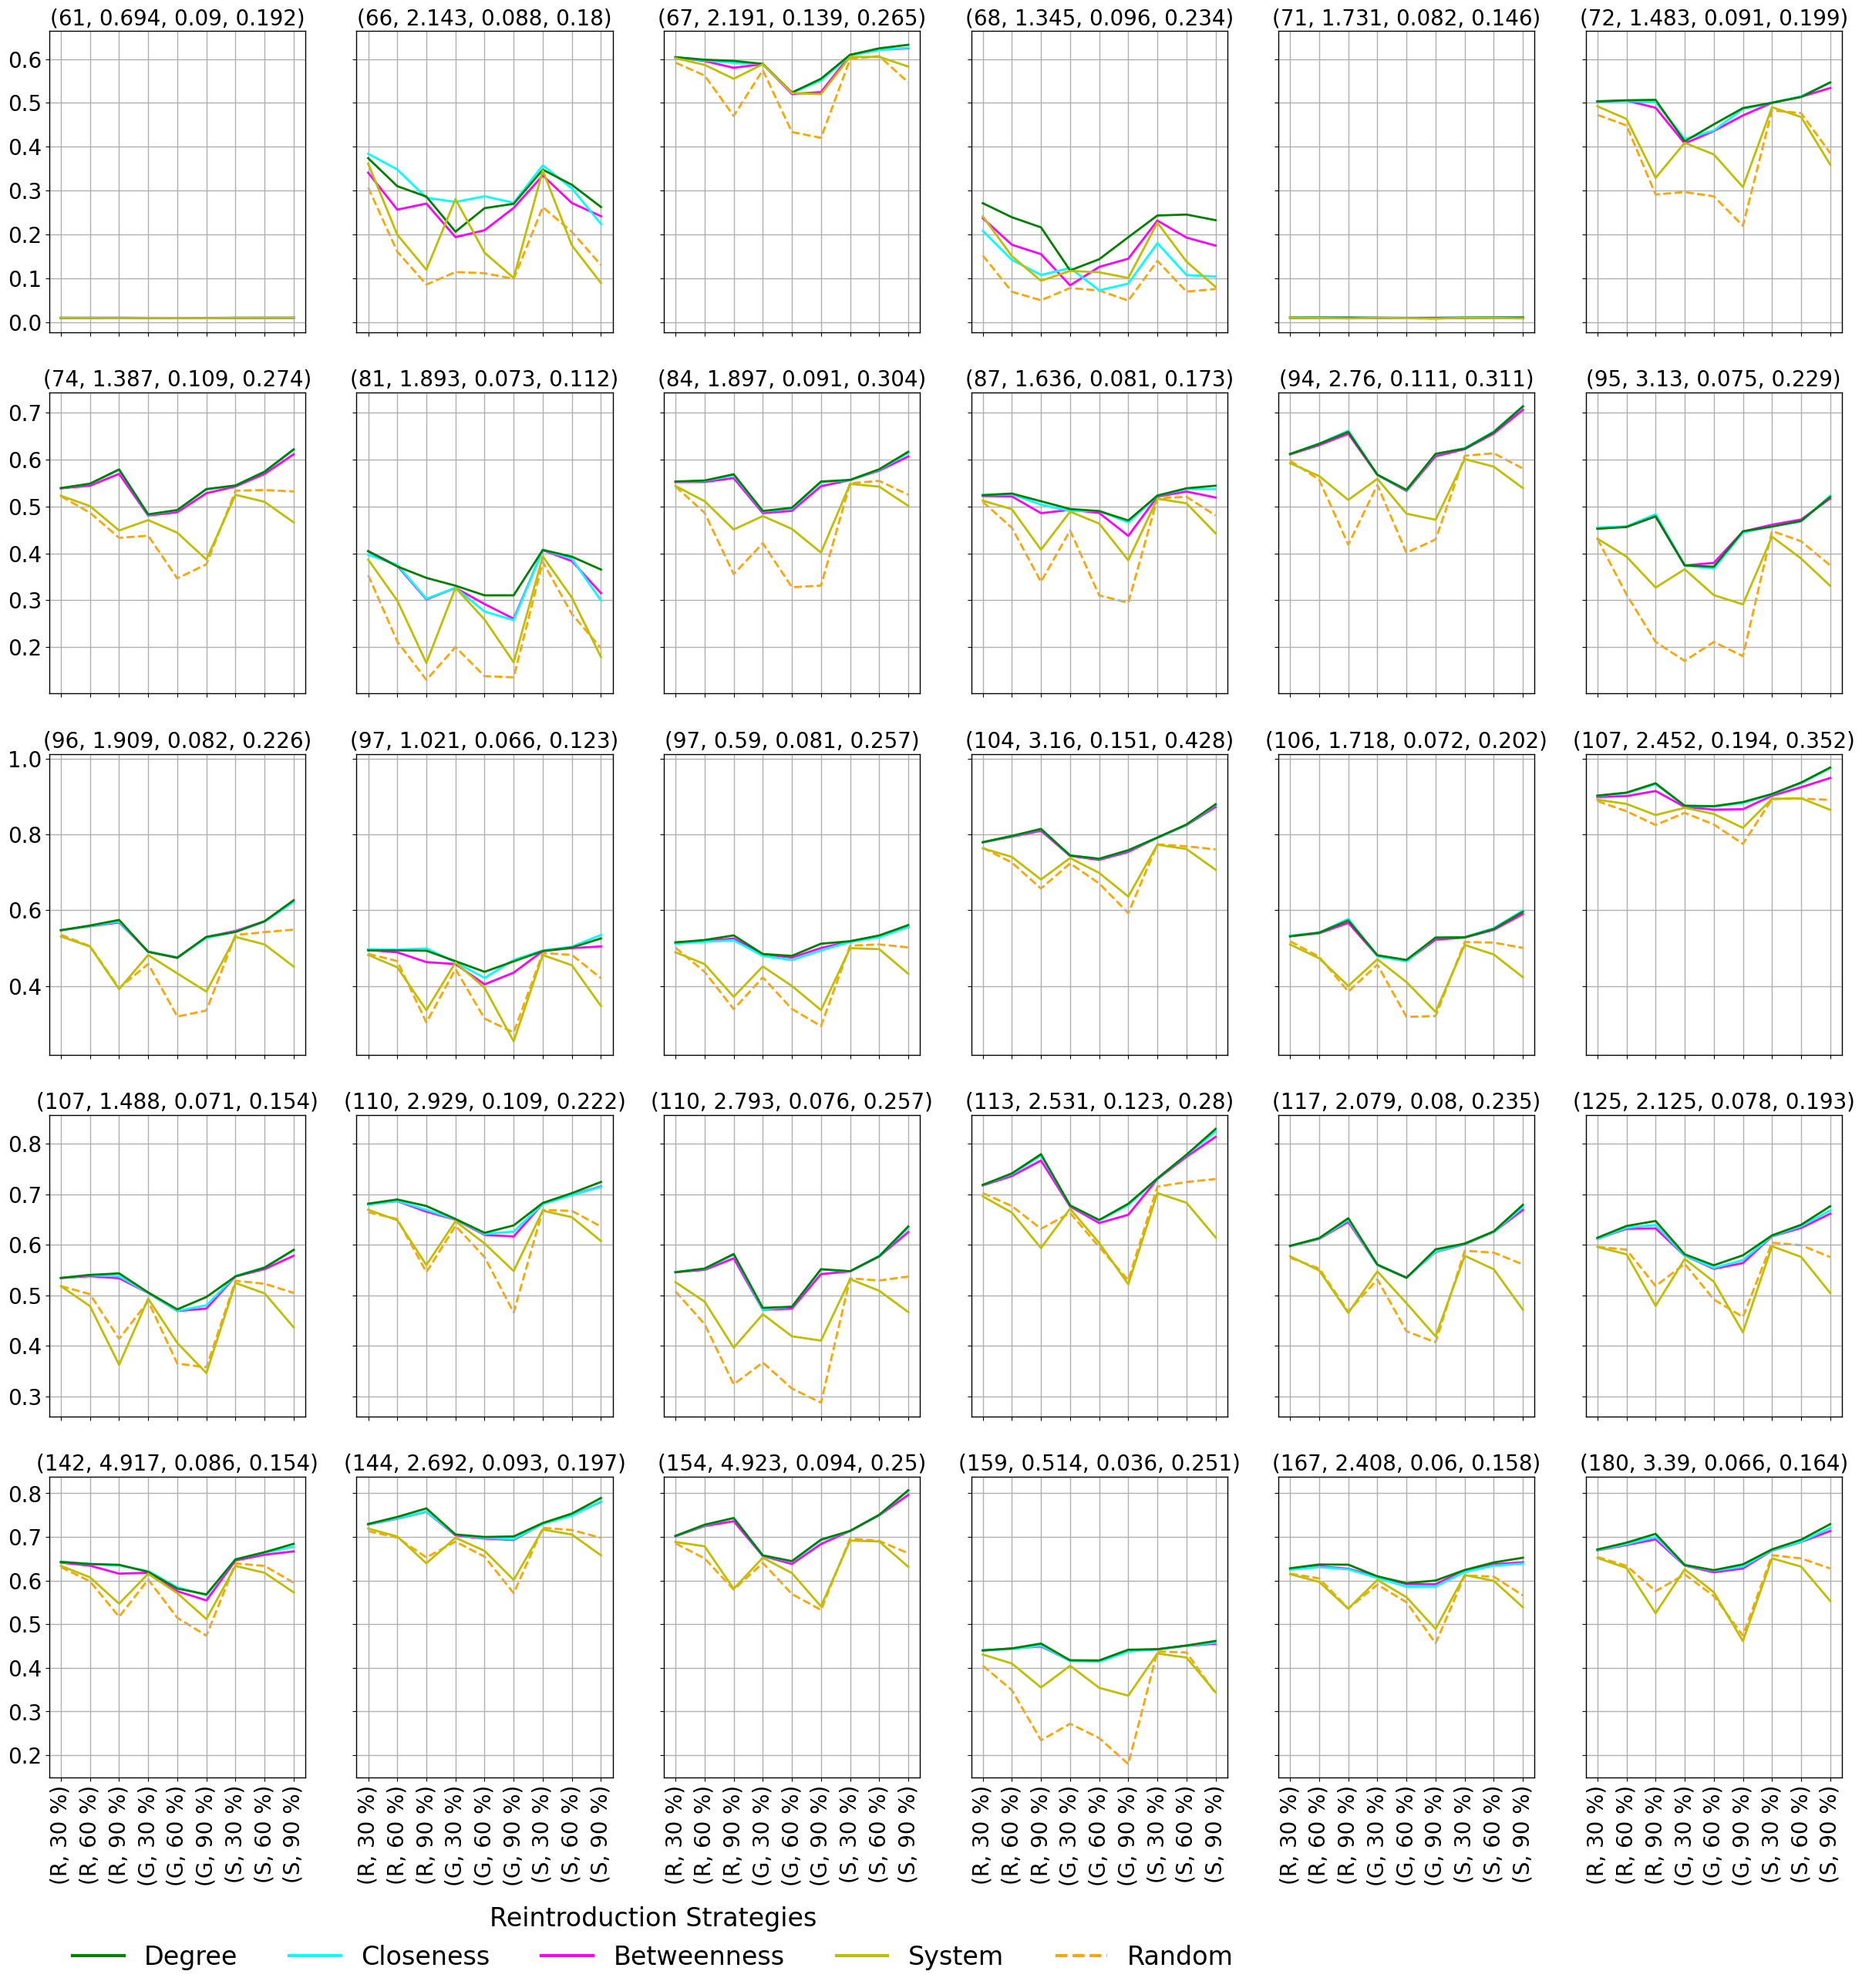

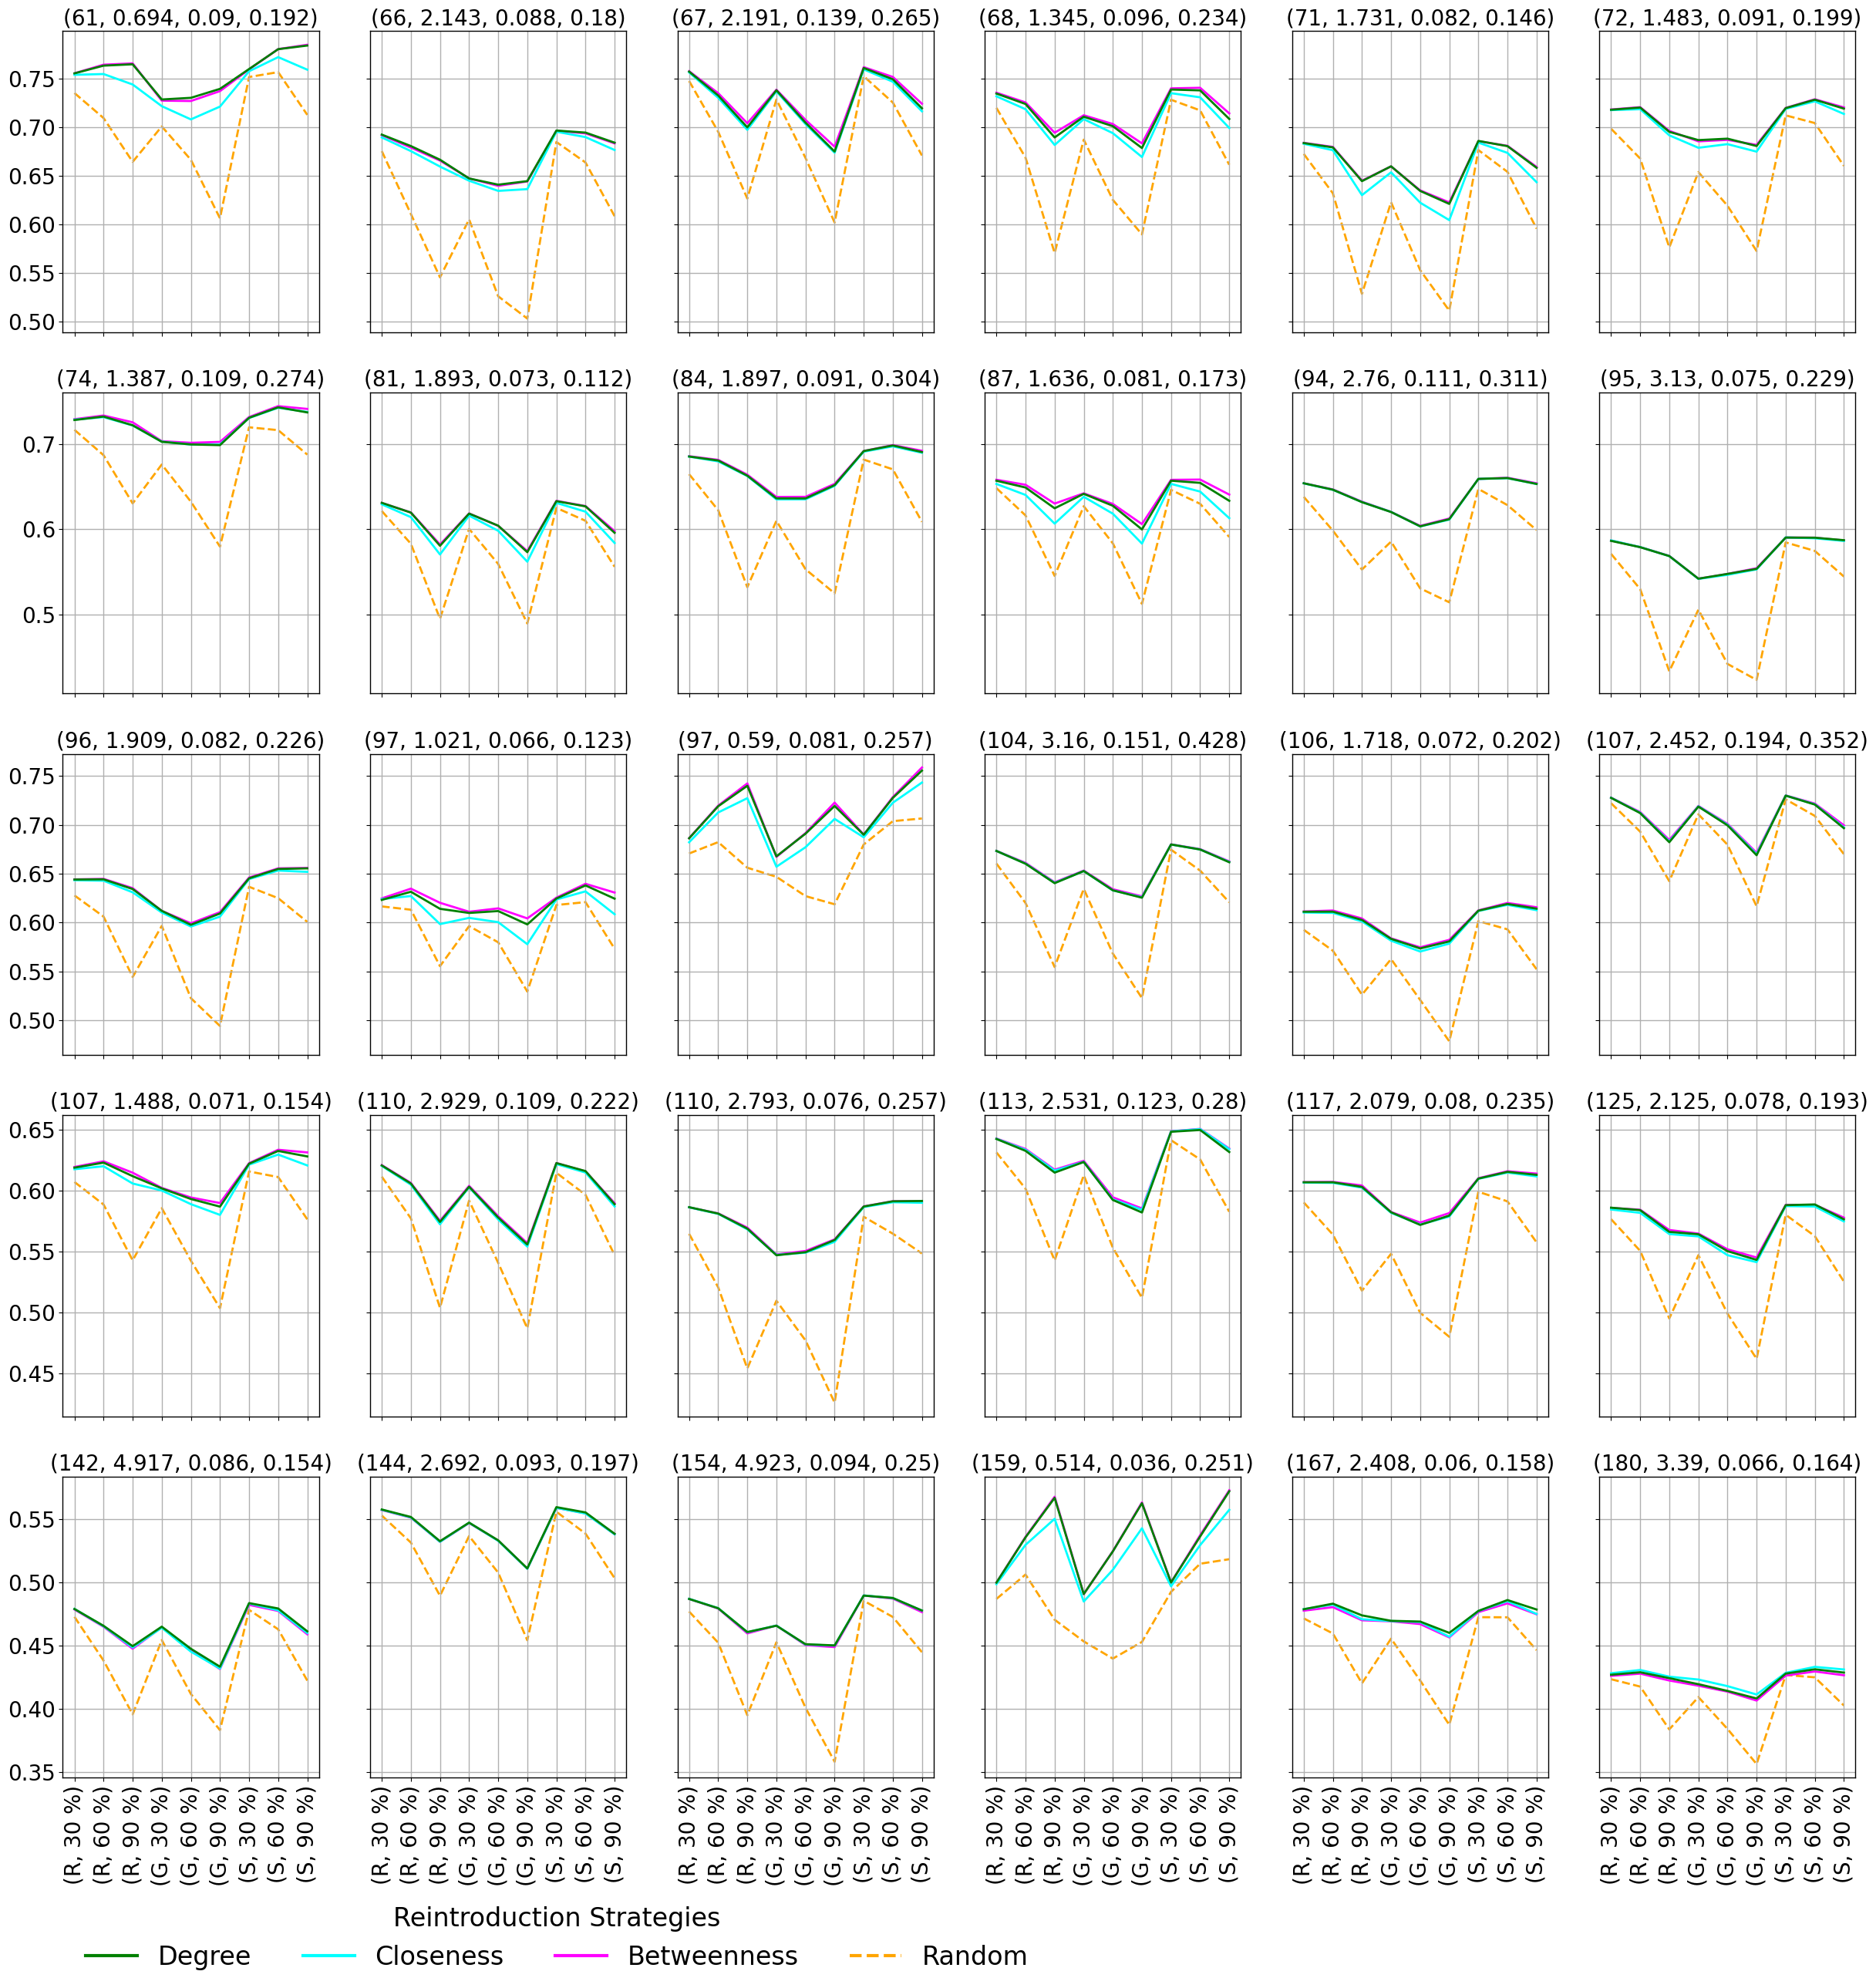

In [36]:
Data_set_lim = {}
s_coords = {0:4 , 1:0, 2:1, 3:2, 4:3}
c = {
    0:'y', 
    1:'green', 
    2:'cyan', 
    3: 'magenta', 
    4:'orange'
    }
for i in ['Real_1D','Real_2D']:
    DATA_TYPE, DF, M = CASE_init(i)
    f, ax = plt.subplots(5, 6, sharex = 'col', figsize = (30,30), dpi = 100, sharey = 'row')
    plt.rcParams['axes.linewidth'] = 1
    #for j in range(30):
    #for ind,j in enumerate([6, 13, 24]):
    for (row,col), ind in zip([(r, c) for r in range(5) for c in range(6)], np.arange(len(M.keys()))):
        NetworkName = DF.iloc[ind,0]
        
        temp = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9) for s in data.keys()]
        #print(i, NetworkName, min(temp), max(temp), np.std(temp))
        Data_set_lim[(row,col, 'min')] = min(temp)
        Data_set_lim[(row,col, 'max')] = max(temp)
        Data_set_lim[(row,col, 'std')] = np.std(temp)
        data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{i}_{NetworkName}.pkl"))
        
        S_Name = {0:'System', 1:'Degree', 2:'Closeness',3:'Betweenness',4:'Random'}
        
        for s in data.keys():
            ax[row,col].plot(
                np.arange(9),
                #[s_coords[s] for _ in range(9)],
                [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
                color=c[s],
                linewidth = 2,
                zorder = 5-s,
                linestyle = 'solid' if s!= 4 else 'dashed'
                )
            x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
            x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
            x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
            
        #ax[0].set_title(f"{j} : {NetworkName} ({i.split('_')[1]})" + '\n', fontsize = 60)
        ax[row,col].set_xticks(np.arange(9))
        ax[row,col].set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90, fontsize = 14)
        #ax[-1].set_xticklabels([])
        ax[row,col].set_title(f"({DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][0]}, {round(DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][1],3)}, {round(DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][2],3)}, {round(DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][3],3)})", fontsize = 20)

    for r_ind,c_ind in [(r, c) for r in range(5) for c in range(6)]:
        ax[r_ind,c_ind].tick_params(axis='both', which='major', labelsize=20)
        ax[r_ind,c_ind].grid(True, linewidth = 1)
        #ax[r,c].set_ylim([0.3,0.8])
    if i == 'Real_1D':
        legend_elements = [
            Line2D([0], [0], color=c[1], lw=3, label='Degree'),
            Line2D([0], [0], color=c[2], lw=3, label='Closeness'),
            Line2D([0], [0], color=c[3], lw=3, label='Betweenness'),
            Line2D([0], [0], color=c[0], lw=3, label='System'),
            Line2D([0], [0], color=c[4], lw=3, label='Random', linestyle='dashed')
            ]
    elif i == 'Real_2D':
        legend_elements = [
            Line2D([0], [0], color=c[1], lw=3, label='Degree'),
            Line2D([0], [0], color=c[2], lw=3, label='Closeness'),
            Line2D([0], [0], color=c[3], lw=3, label='Betweenness'),
            Line2D([0], [0], color=c[4], lw=3, label='Random', linestyle='dashed')
            ]
    l1 = ax[-1,0].legend(handles=legend_elements, bbox_to_anchor = [0.0,-0.35], loc = 'upper left', title = 'Reintroduction Strategies', fontsize = 24, frameon = False, ncol = 5)
    l1.get_title().set_fontsize(24)
    
#del a
#del f,ax,s,k,X_Val,temp,temp2,fw,fh,s_coords,S_Name,C1,C2
#del NetworkName, i, j, data

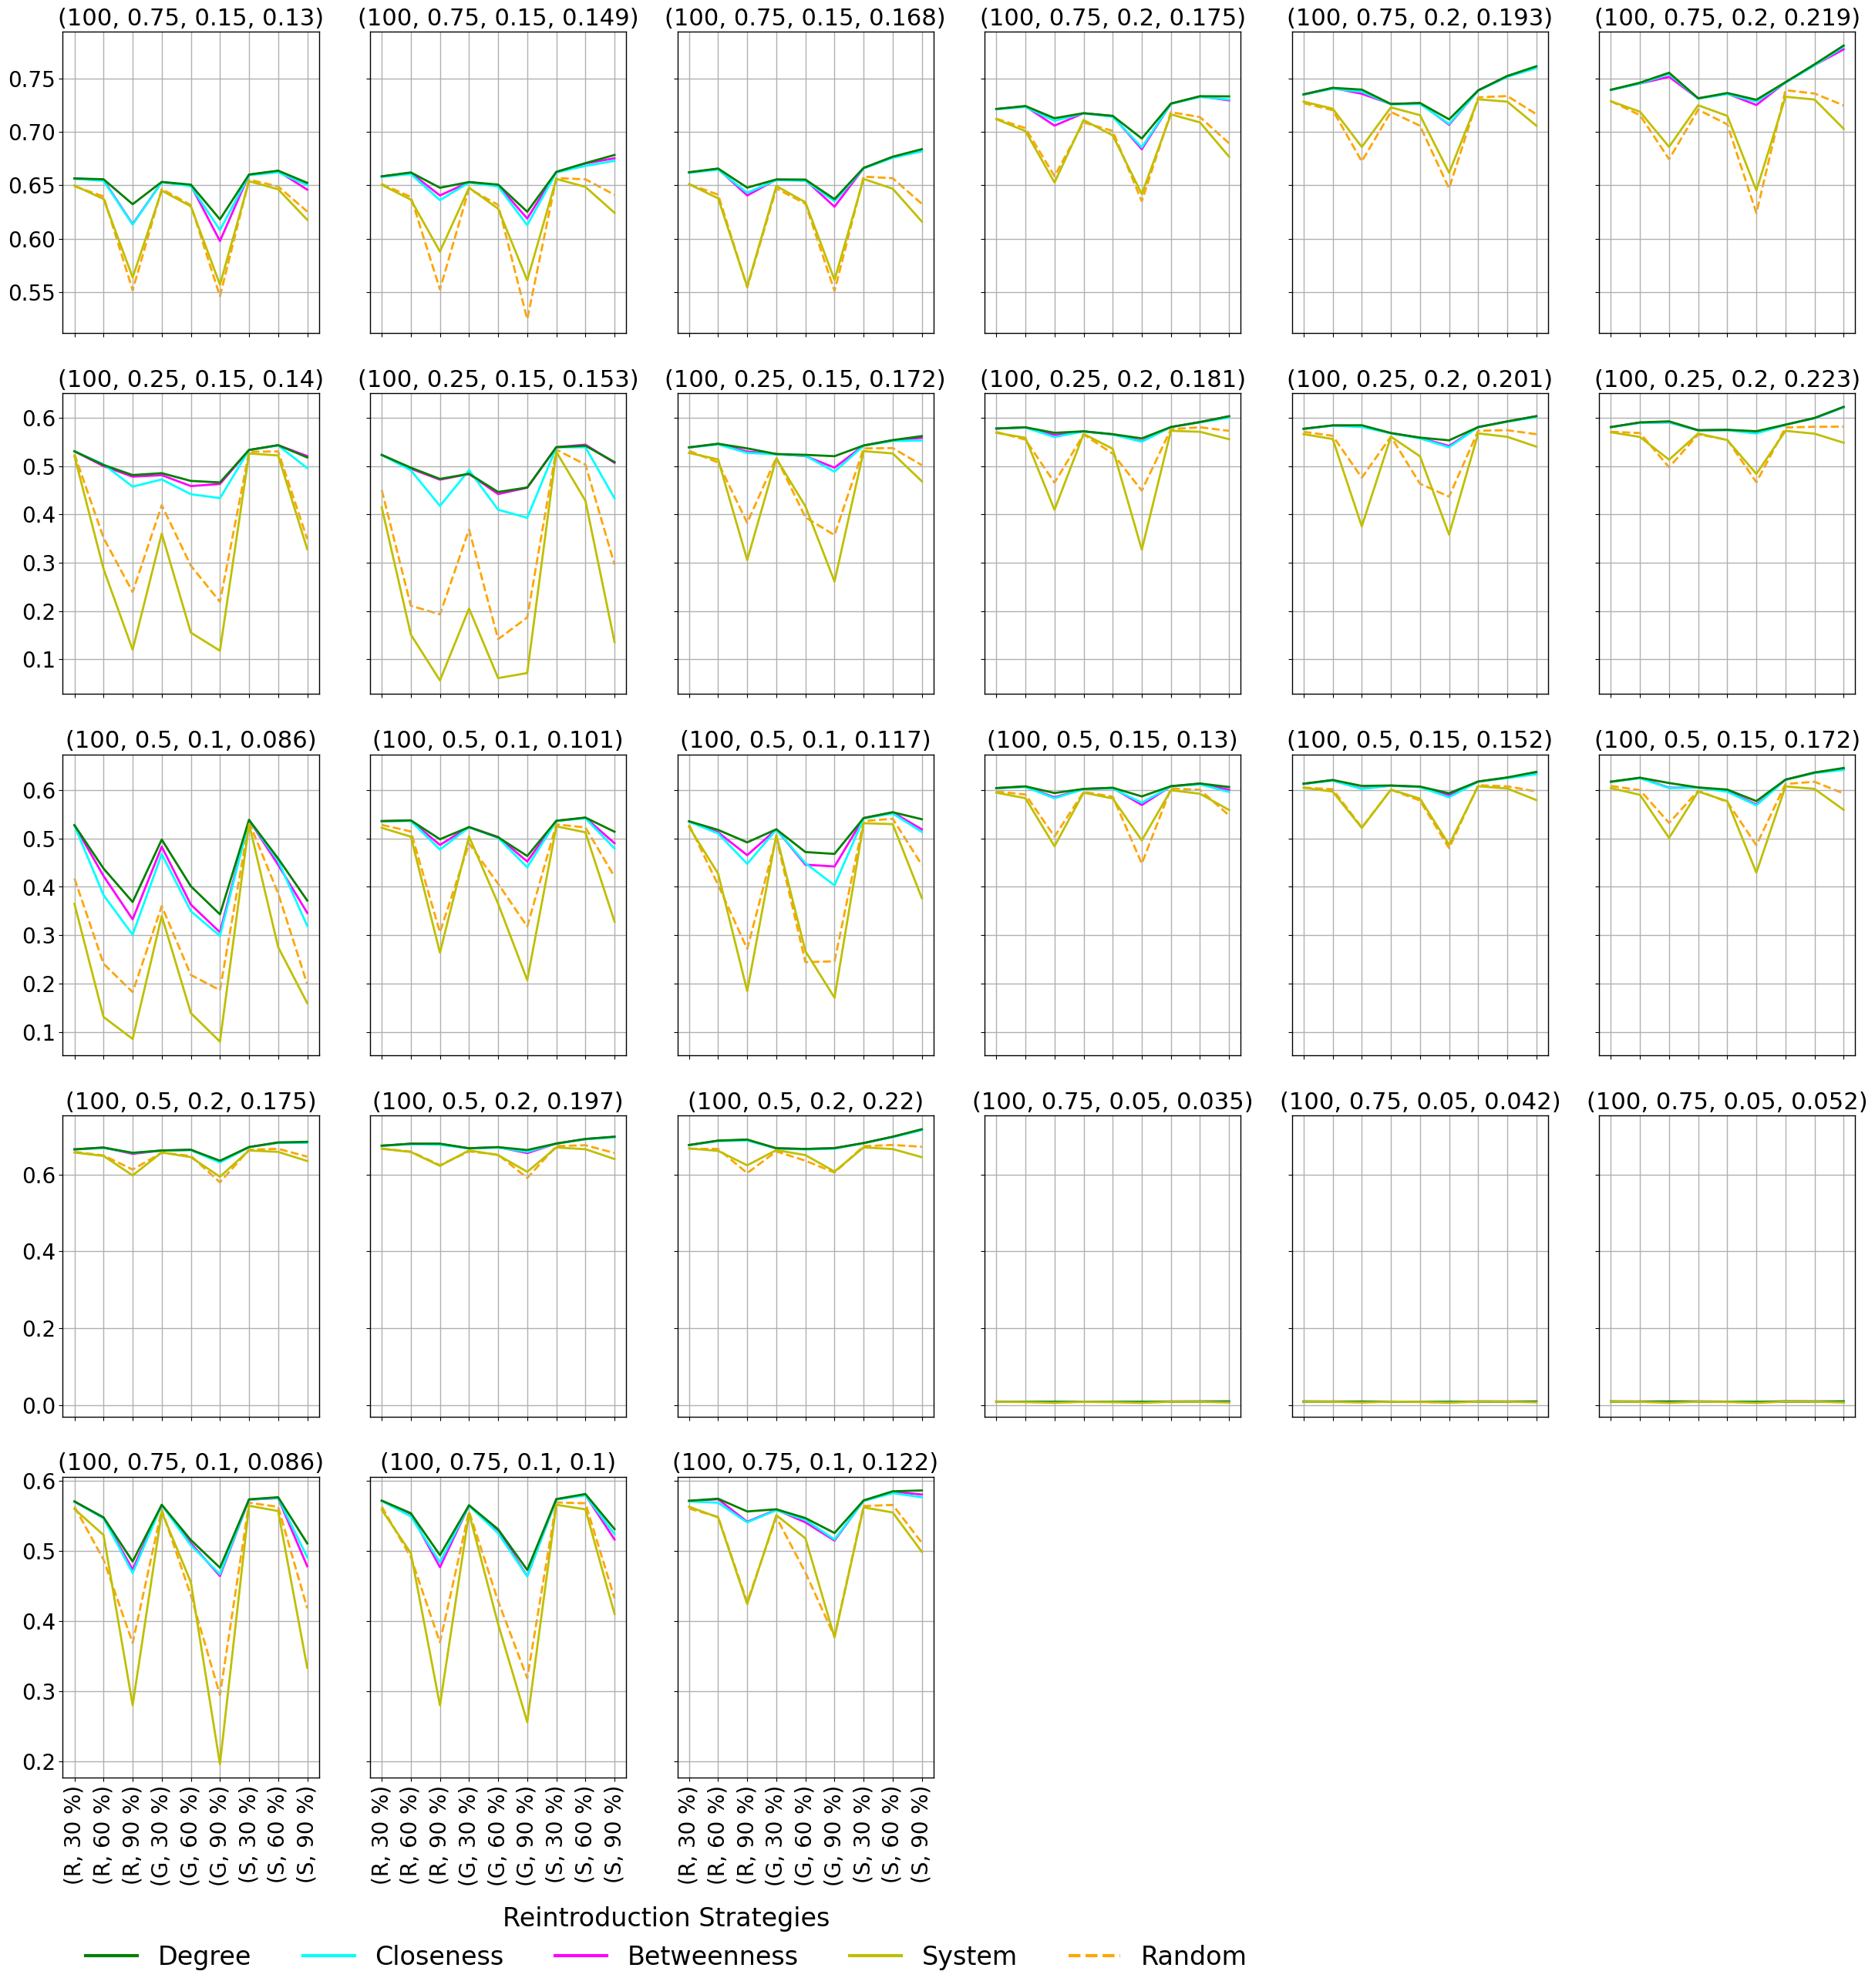

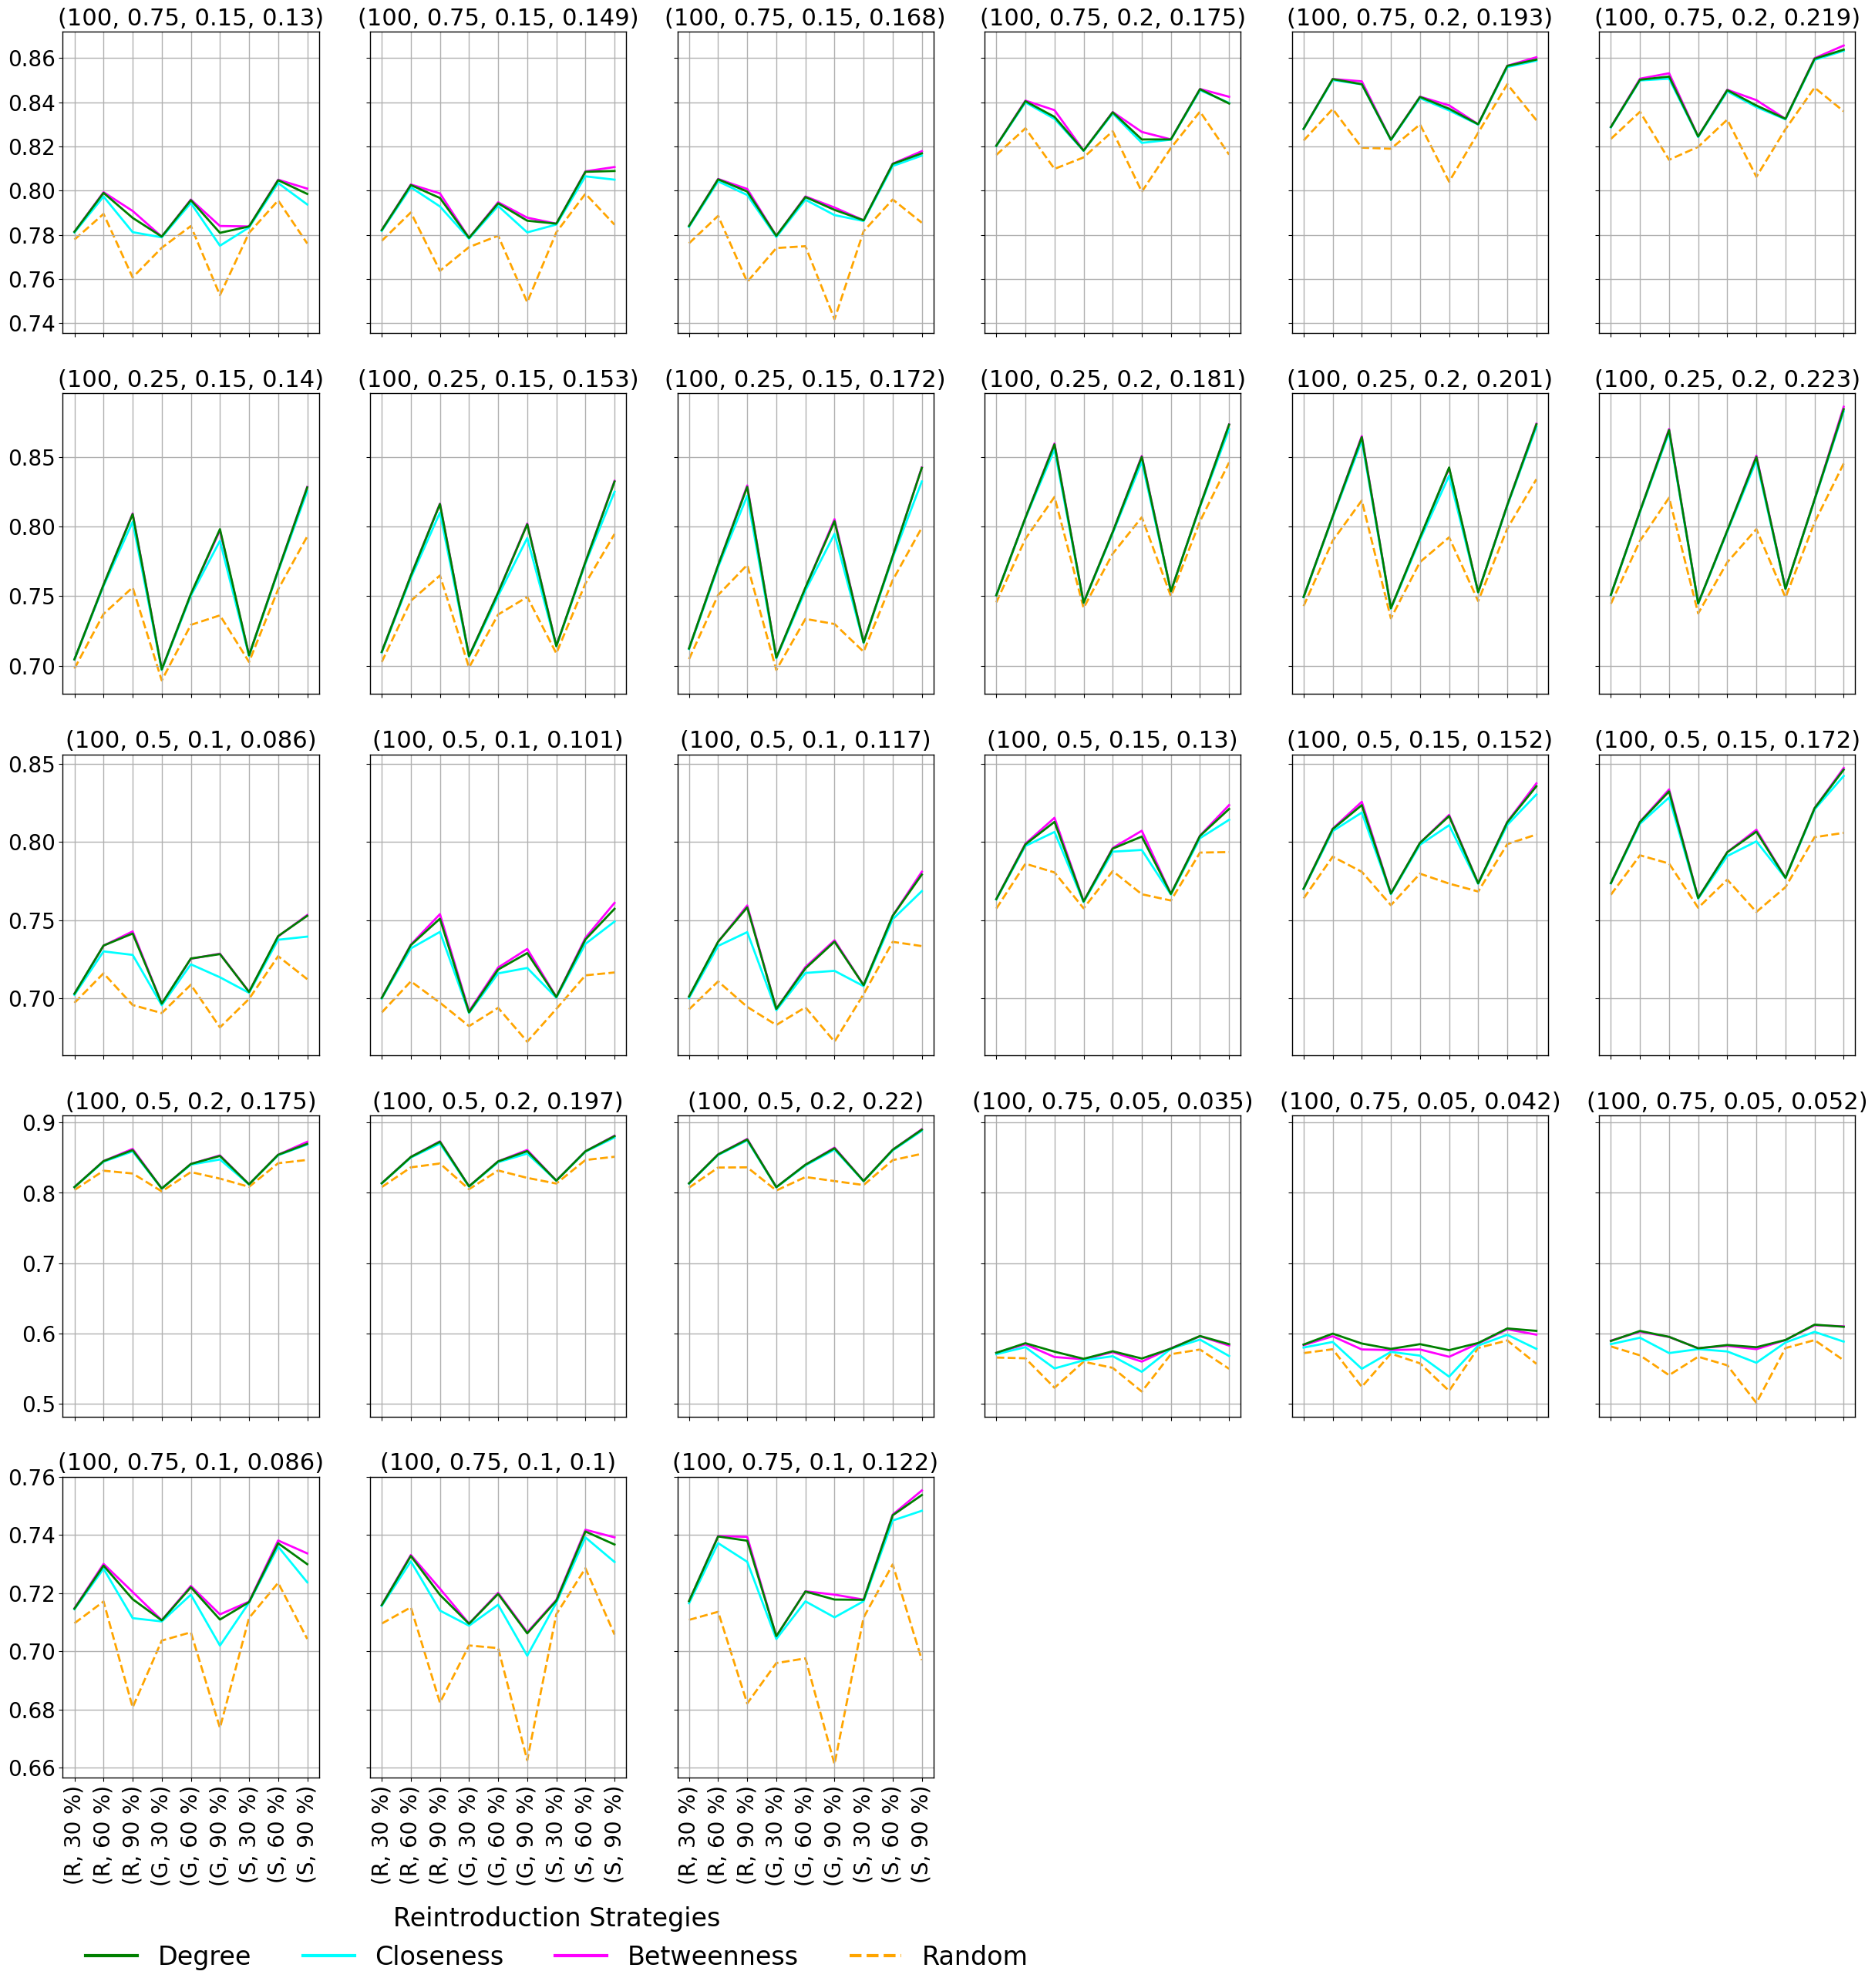

In [7]:
Data_set_lim = {}
s_coords = {0:4 , 1:0, 2:1, 3:2, 4:3}
c = {
    0:'y', 
    1:'green', 
    2:'cyan', 
    3: 'magenta', 
    4:'orange'
    }
import matplotlib
for CASE_TO_SOLVE in ['Syn_1D','Syn_2D']:
    DATA_TYPE, DF, M = CASE_init(CASE_TO_SOLVE)
    f, ax = plt.subplots(5, 6, sharex = 'col', figsize = (30,30), dpi = 100, sharey = 'row')
    plt.rcParams['axes.linewidth'] = 1
    #'''
    for NetworkName in M.keys():
        try:
            data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{CASE_TO_SOLVE}_{NetworkName}.pkl"))
        except:
            data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = CASE_TO_SOLVE)
            PickleObj(data, os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{CASE_TO_SOLVE}_{NetworkName}.pkl"))
            print(f"{CASE_TO_SOLVE}_{NetworkName}")
    #'''
    for (row,col), ind in zip([(r, c) for r in range(5) for c in range(6)], np.arange(len(M.keys()))):
        NetworkName = DF.iloc[ind,0]
        temp = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9) for s in data.keys()]
        #print(i, NetworkName, min(temp), max(temp), np.std(temp))
        Data_set_lim[(row,col, 'min')] = min(temp)
        Data_set_lim[(row,col, 'max')] = max(temp)
        Data_set_lim[(row,col, 'std')] = np.std(temp)
        data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Figure02Data', f"{CASE_TO_SOLVE}_{NetworkName}.pkl"))
        
        S_Name = {0:'System', 1:'Degree', 2:'Closeness',3:'Betweenness',4:'Random'}
        
        for s in data.keys():
            ax[row,col].plot(
                np.arange(9),
                #[s_coords[s] for _ in range(9)],
                [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)], 
                color=c[s],
                linewidth = 2,
                zorder = 5-s,
                linestyle = 'solid' if s!= 4 else 'dashed'
                )
            x_mean = [np.mean(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
            x_min = [np.min(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
            x_max = [np.max(data[s][(data[s].Var == 'Abundance') & (data[s].key == k)]['Value'].to_numpy()) for k in np.arange(9)]
            
        #ax[0].set_title(f"{j} : {NetworkName} ({i.split('_')[1]})" + '\n', fontsize = 60)
        ax[row,col].set_xticks(np.arange(9))
        ax[row,col].set_xticklabels([f"({Per_S}, {Per_Frac} %)" for Per_S in ['R','G','S'] for Per_Frac in [30,60,90]], rotation = 90, fontsize = 14)
        #ax[-1].set_xticklabels([])
        ax[row,col].set_title(f"({DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][0]}, {round(DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][1],3)}, {round(DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][2],3)}, {round(DF[DF.NetworkName == NetworkName].to_numpy()[0,1:][3],3)})", fontsize = 22)
        
    for r_ind,c_ind in [(r, c) for r in range(5) for c in range(6)]:
        ax[r_ind,c_ind].tick_params(axis='both', which='major', labelsize=20)
        ax[r_ind,c_ind].grid(True, linewidth = 1)
        #ax[r,c].set_ylim([0.3,0.8])
    if CASE_TO_SOLVE.split('_')[1] == '1D':
        legend_elements = [
            Line2D([0], [0], color=c[1], lw=3, label='Degree'),
            Line2D([0], [0], color=c[2], lw=3, label='Closeness'),
            Line2D([0], [0], color=c[3], lw=3, label='Betweenness'),
            Line2D([0], [0], color=c[0], lw=3, label='System'),
            Line2D([0], [0], color=c[4], lw=3, label='Random', linestyle='dashed')
            ]
    elif CASE_TO_SOLVE.split('_')[1] == '2D':
        legend_elements = [
            Line2D([0], [0], color=c[1], lw=3, label='Degree'),
            Line2D([0], [0], color=c[2], lw=3, label='Closeness'),
            Line2D([0], [0], color=c[3], lw=3, label='Betweenness'),
            Line2D([0], [0], color=c[4], lw=3, label='Random', linestyle='dashed')
            ]
    l1 = ax[-1,0].legend(handles=legend_elements, bbox_to_anchor = [0.0,-0.35], loc = 'upper left', title = 'Reintroduction Strategies', fontsize = 24, frameon = False, ncol = 5)
    l1.get_title().set_fontsize(24)

    ax[-1,-1].grid(False)
    ax[-1,-1].axis('off')
    #ax[-1,-1].set_xticklabels([])
    #ax[-1,-1].set_yticklabels([])
    
    ax[-1,-2].grid(False)
    ax[-1,-2].axis('off')
    #ax[-1,-2].set_xticklabels([])
    #ax[-1,-2].set_yticklabels([])

    ax[-1,-3].grid(False)
    ax[-1,-3].axis('off')
    #ax[-1,-3].set_xticklabels([])
    #ax[-1,-3].set_yticklabels([])

#del a
#del f,ax,s,k,X_Val,temp,temp2,fw,fh,s_coords,S_Name,C1,C2
#del NetworkName, i, j, data
